## Lab 1.1 - Analyzing Real Estate Data in St. Petersburg
We have data from Yandex.Realty classified https://realty.yandex.ru containing real estate listings for apartments in St. Petersburg and Leningrad Oblast from 2016 till the middle of August 2018. In this Lab you'll learn how to work with datasets in python using pandas library for data analysis using the provided data. 
For datasets like this it becomes hard to use Excel because of its size. If you learn how to work with pandas you'll be able to do basic analytical research much faster than in Excel.
To execute code IPython notebook click on the Cell and press Shift-Enter.
If you don't have any experience with Jupyter notebooks, please look at this tutorial: https://mybinder.org/v2/gh/ipython/ipython-in-depth/master?filepath=binder/Index.ipynb

### Main objectives
After successful completion of the lab work students will be able to:
-	Analyze large datasets that don't work well in Excel using IPython notebook and pandas library
-   Find outliers and remove them in the datasets
-	Calculate different statistics on data fields


### Tasks
-	Calculate median and mean sell and rent prices in St. Petersburg
-   Find outliers: too cheap or too expensive apartments which seem to be a wrong data. Remove them from the dataset.
-	Find houses with the most cheapest and most expensive prices per square meter.
-   Analyze how many rent offers have the commission and what is the most popular commission



In [1]:
# let's import pandas library and set options to be able to view data right in the browser
# Assign pd for a short alias for pandas library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import plotly.express as px

sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')
# Call set_option function fron pandas library to edit them limit for number of the displayed
# columns, width of all columns and maximum width of one column
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [2]:
# let's look what is inside our data file to understand how we can export it. 
# We can use linux command "head" which shows the first row in the file. 
# In IPython notebooks you can execute linux commands using "!" prefixe before the command name. 
# This mechanism is called "IPython magic"
!head -n 3 data/spb.real.estate.archive.2018.tsv

offer_id	first_day_exposition	last_day_exposition	last_price	floor	open_plan	rooms	studio	area	kitchen_area	living_area	agent_fee	renovation	offer_type	category_type	unified_address	building_id
5490504238877583424	2014-11-27T00:00:00+03:00	2016-03-14T00:00:00+03:00	3676740.0	19	False	1	False	27.4	16.56	16.56		0.0	1	2	Россия, Санкт-Петербург, улица Шкапина, 9-11	3552413344225333068
5490504238903444021	2014-11-27T00:00:00+03:00	2016-04-28T00:00:00+03:00	7038880.0	2	False	3	False	85.84	19.64	41.2		0.0	1	2	Россия, Санкт-Петербург, Кушелевская дорога, 3к4	7274736308217971906


In [3]:
# if you don't remember what linux command does (i.e. what is -n), you can always look for help
!head --help

Usage: head [OPTION]... [FILE]...
Print the first 10 lines of each FILE to standard output.
With more than one FILE, precede each with a header giving the file name.

With no FILE, or when FILE is -, read standard input.

Mandatory arguments to long options are mandatory for short options too.
  -c, --bytes=[-]NUM       print the first NUM bytes of each file;
                             with the leading '-', print all but the last
                             NUM bytes of each file
  -n, --lines=[-]NUM       print the first NUM lines instead of the first 10;
                             with the leading '-', print all but the last
                             NUM lines of each file
  -q, --quiet, --silent    never print headers giving file names
  -v, --verbose            always print headers giving file names
  -z, --zero-terminated    line delimiter is NUL, not newline
      --help     display this help and exit
      --version  output version information and exit

NUM may have a mu

In [4]:
!ls

data				   lectures
lab1_1_EDA.ipynb		   spb.real.estate.archive.sample5000.tsv
lab1_1_EDA_real_estate_data.ipynb  Untitled.ipynb
lab2_building_model.ipynb


In [5]:
# we see that it's tab separated file, we can load it with pd.read_table method
# load our dataset and see which data it contains.
# HINT: you can type 'Tab' after starting typing the filename and IPython will automatically fill it for you
# After this command a new variable will be created (spb_df) containing pandas dataframe with data in our file
# You can think of dataframe structure as an analogue of Excel sheet
spb_df = pd.read_table('data/spb.real.estate.archive.2018.tsv')

In [6]:
# HINT: if you don't know which arguments any function takes or what it does you can check the documenation right 
# in the notebook just by adding "?" after the function name. Let's look at pandas read_table function:
pd.read_table?

Signature:
pd.read_table(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    squeeze: 'bool | None' = None,
    prefix: 'str | lib.NoDefault' = <no_default>,
    mangle_dupe_cols: 'bool' = True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates=False,
    in

In [7]:
# let's check how much data in terms of rows we have where each row represent 
# one offer from Yandex.Realty
len(spb_df)

429187

In [8]:
# let's look at random sample of size 10 of the loaded dataset to understand what's inside
spb_df.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
222570,6276744355454470763,2017-09-27T00:00:00+03:00,2017-09-28T00:00:00+03:00,70000.0,6,False,3,False,73.0,9.0,64.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, улица Одоевского, 22",9144694981706497189
4130,1817166,2015-04-19T00:00:00+03:00,2016-01-21T00:00:00+03:00,17000.0,4,False,1,False,35.0,NaN,NaN,100.0,3.0,2,2,"Россия, Санкт-Петербург, Дачный проспект, 36к7",8280304085470097818
151227,7340091001891486791,2017-03-21T00:00:00+03:00,2017-08-11T00:00:00+03:00,4665996.0,11,False,0,True,31.0,NaN,21.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Московский проспект, 65к3",6441509679222394965
202226,9174606537144174035,2015-01-10T00:00:00+03:00,2017-08-23T00:00:00+03:00,22000.0,2,False,1,False,41.0,11.0,19.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, проспект Сизова, 25",4203177277370458721
109294,6300461494542529024,2016-11-18T00:00:00+03:00,2017-01-28T00:00:00+03:00,3340000.0,3,False,1,False,32.0,8.5,14.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Руставели, 58к1",8058811039867188404
361096,7327209191916591329,2018-05-24T00:00:00+03:00,2018-08-20T00:00:00+03:00,35000.0,13,False,1,False,34.8,9.0,19.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, Заставская улица, 46к2",465752808401383108
156939,4109256028820666368,2017-02-06T00:00:00+03:00,2018-08-20T00:00:00+03:00,3900000.0,1,False,1,False,40.5,10.7,18.7,NaN,3.0,1,2,"Россия, Санкт-Петербург, Глухарская улица, 5к1",8747359979172384268
317220,8310251211149669374,2017-04-09T00:00:00+03:00,2018-08-20T00:00:00+03:00,99000000.0,3,False,4,False,206.0,20.0,120.0,0.0,NaN,1,2,"Россия, Санкт-Петербург, 2-я Берёзовая аллея, 34",8420885697335332840
223375,3315695227661742337,2017-09-28T00:00:00+03:00,2017-09-30T00:00:00+03:00,20000.0,14,False,1,False,40.0,10.0,20.0,50.0,0.0,2,2,"Россия, Санкт-Петербург, проспект Славы, 51",135586439760362577
203674,1896730479083423738,2017-07-06T00:00:00+03:00,2017-08-21T00:00:00+03:00,35000.0,8,False,2,False,81.0,28.0,36.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Кондратьевский проспект, 62к3",1081182048329082447


In [9]:
len(spb_df)

429187

In [10]:
#spb_df.sample(5000).to_csv('spb.real.estate.archive.sample5000.tsv', index = False, sep='\t')

In [11]:
!pwd

/home/jovyan/E2E_ML


### Analyze prices for rent and sell
We see that we have both RENT and SELL data. 
<p>offer_type column contains data to distinct them, 2 stands for RENT, 1 for SELL


#### Analyze rent prices

In [12]:
# at first let's split our dataframe to rent and sell
# Select some part of dataframe according to conditions in brackets
rent_df = spb_df[spb_df.offer_type == 2]
sell_df = spb_df[spb_df.offer_type == 1]
# .format function allows you to put variales' values instead of {} in the final string
print("Total rent data size: {}".format(len(rent_df)))
print("Total sell data size: {}".format(len(sell_df)))

Total rent data size: 171186
Total sell data size: 258001


In [13]:
# let's check median and price for renting apartments
# .last_price indicates that you use data just from the column named last_price
rent_median_price = rent_df.last_price.median()
rent_mean_price = rent_df.last_price.mean()
print("Rent median price: {}".format(rent_median_price))
print("Rent mean price: {}".format(rent_mean_price))

Rent median price: 25000.0
Rent mean price: 31719.256638977487


In [14]:
# Just to look at data of one column you can select this column. 
# 'head' function will take only first rows 
rent_df.last_price.head(10)

1086    20000.0
1096    40000.0
1097    45000.0
1149    21000.0
1514    25000.0
1515    35000.0
1516    22000.0
1537    20000.0
1555    26000.0
1695    25000.0
Name: last_price, dtype: float64

#### Let's look at the most expensive apartments in rent

In [15]:
# .max function returns the maximum value across all rows
max_price_rent = rent_df.last_price.max()

In [16]:
print("Max price in rent: {}".format(max_price_rent))

Max price in rent: 4900000.0


In [17]:
# Now select all offers where price is equal to maximum value across all rent prices
rent_df_max = rent_df[rent_df.last_price == max_price_rent]

In [18]:
rent_df_max

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
123675,5594900220237251840,2017-01-16T00:00:00+03:00,2017-01-16T00:00:00+03:00,4900000.0,3,False,3,False,55.4,5.5,42.1,NaN,0.0,2,2,"Россия, Санкт-Петербург, Новочеркасский проспект, 36",7844665691371923607


We can see that it was probably a mistake. It's hard to imagine why an aparment could cost 4.9 mln rubles per month. To analyze it let's look at the random sample of rent offers with prices of more than 1 mln rubles.

In [19]:
# Knowing real estate market in St.Petersburg we understand 
# that offers with rent prices over 1 million rubles are outliers
outliers_rent = rent_df[rent_df.last_price > 1000000]
print("Number of outliers in rent: {}".format(len(outliers_rent)))

Number of outliers in rent: 22


In [20]:
outliers_rent.sample(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
349765,7521881594612635746,2018-05-14T00:00:00+03:00,2018-05-21T00:00:00+03:00,4700000.0,10,False,1,False,40.3,8.3,20.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, Ленинский проспект, 111к2",2371480959169104773
38416,5340729,2016-02-08T00:00:00+03:00,2016-02-15T00:00:00+03:00,2550000.0,8,False,1,False,38.0,6.0,19.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Варшавская улица, 51к1",6532707473577967135
289495,6929908963211630336,2018-02-10T00:00:00+03:00,2018-02-16T00:00:00+03:00,1800000.0,2,False,1,False,39.0,9.0,19.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, улица Цимбалина, 23",1935729367298454088
289038,4088017598264857345,2018-02-09T00:00:00+03:00,2018-03-21T00:00:00+03:00,1330000.0,3,False,1,False,33.0,6.0,19.0,NaN,3.0,2,2,"Россия, Ленинградская область, Луга, проспект Урицкого, 65",1792010144615909485
306476,6589696843731071745,2018-03-12T00:00:00+03:00,2018-04-02T00:00:00+03:00,2500000.0,2,False,4,False,150.0,53.0,47.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, Волховский переулок, 4",4642914072625498389


In [21]:
# We see that all of these offers are results of user mistakes.
# Pause to think what kind of mistakes might cause such numbers?
# Let's now look at rent offers below 1M but more than 500K

In [22]:
rent_df[(rent_df.last_price > 500000) & (rent_df.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
83621,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
89836,6302977522901450489,2016-09-14T00:00:00+03:00,2016-09-15T00:00:00+03:00,800000.0,2,False,2,False,80.0,20.0,40.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большая Морская улица, 27",8010764606439654926
106222,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
172166,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508
172950,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
253075,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
321216,2596865999798823681,2018-03-31T00:00:00+03:00,2018-04-04T00:00:00+03:00,575000.0,3,False,4,False,120.0,NaN,NaN,50.0,1.0,2,2,"Россия, Санкт-Петербург, Кременчугская улица, 17к3",9078299753075959719
323711,9106659135022232833,2018-04-03T00:00:00+03:00,2018-06-15T00:00:00+03:00,600000.0,1,False,4,False,90.0,13.0,54.0,0.0,11.0,2,2,"Россия, Санкт-Петербург, Большой Сампсониевский проспект, 33/1",192308642065385452
336616,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
419166,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355


In [23]:
# for these cases sometimes it seems that the price is correct - in the unified_address column we
# see that these offers are from elite houses
# like here: https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20проспект%20Динамо%2C%206/snyat/kvartira/
# but for some of them price seems to be 10 times more than it should be, like here
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Большая%20Морская%20улица%2C%2027/snyat/kvartira/
# let's find these cases

### Calculate price per square meter, get median prices for house and find outliers with the help of this

In [24]:
# Create a new column price_per_sq_m and calculate price per sq m
rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area

In [25]:
rent_df.head(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m
1086,1100202,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,False,1,False,28.0,8.0,20.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,714.285714
1096,5028522699704970725,2015-01-25T00:00:00+03:00,2016-01-20T00:00:00+03:00,40000.0,4,False,2,False,72.0,10.0,44.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 66",3406104650917898355,555.555556
1097,5028522699709767236,2015-01-25T00:00:00+03:00,2016-01-21T00:00:00+03:00,45000.0,2,False,2,False,55.0,NaN,33.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большой проспект П.С., 102",2357095685903407888,818.181818
1149,1100874,2015-01-28T00:00:00+03:00,2016-01-16T00:00:00+03:00,21000.0,5,False,1,False,35.0,8.0,18.0,NaN,11.0,2,2,"Россия, Санкт-Петербург, Лужская улица, 8",5887402119500981764,600.000000
1514,875413,2015-02-13T00:00:00+03:00,2016-01-23T00:00:00+03:00,25000.0,10,False,1,True,44.0,15.0,18.0,90.0,10.0,2,2,"Россия, Санкт-Петербург, Учительская улица, 3",6527910144166454997,568.181818


In [26]:
# find what's median and mean price per square meter in rent
median_price_per_sq_m = rent_df.price_per_sq_m.median()
mean_price_per_sq_m = rent_df.price_per_sq_m.mean()
print("Median price per sq m in rent: {}".format(median_price_per_sq_m))
print("Mean price per sq m in rent: {}".format(mean_price_per_sq_m))

Median price per sq m in rent: 550.0
Mean price per sq m in rent: 600.1110692967684


#### Find median price per sq m per house

In [27]:
# .groupby function groups dataframe by a selected column (unified_address)
# For each address we then take a median of price per sq m and return a new dataframe 
# with a result
house_rent_df = rent_df.groupby('unified_address').price_per_sq_m.median().reset_index()

In [28]:
house_rent_df.head(5)

,unified_address,price_per_sq_m
0,"Россия, Ленинградская область, Бокситогорск, Комсомольская улица, 5А",171.428571
1,"Россия, Ленинградская область, Бокситогорск, Южная улица, 15",250.000000
2,"Россия, Ленинградская область, Бокситогорск, улица Металлургов, 7",164.948454
3,"Россия, Ленинградская область, Бокситогорск, улица Павлова, 37",138.888889
4,"Россия, Ленинградская область, Бокситогорский район, Пикалёво, 6-й микрорайон, 25",195.652174


In [29]:
# Rename the column with a 'rename' function in this new dataframe
house_rent_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

#### Merge rent data with house median prices and inspect outliers

In [30]:
# With a 'merge' function join two dataframes.
# As these 2 dataframes have only one common column name (unified_address) it will merge dataframes by it
rent_df = rent_df.merge(house_rent_df)

In [31]:
# Assign outliers if price per sq m is 5 times higher than the median value in the house
outliers = rent_df[(rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5]

In [32]:
print(len(outliers))

49


In [33]:
outliers.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
89576,7516885188513795329,2016-11-17T00:00:00+03:00,2016-12-05T00:00:00+03:00,225000.0,1,False,2,False,45.0,NaN,NaN,50.0,7.0,2,2,"Россия, Санкт-Петербург, проспект Кузнецова, 23к1",2929603598081674534,5000.000000,500.000000
30749,3751871,2015-08-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,2100000.0,2,False,2,False,49.0,7.0,NaN,90.0,3.0,2,2,"Россия, Санкт-Петербург, проспект Народного Ополчения, 179к1",2789010111420303027,42857.142857,546.875000
84160,5148571494042384844,2016-03-15T00:00:00+03:00,2016-06-06T00:00:00+03:00,240000.0,4,False,2,False,47.0,9.0,30.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, улица Брянцева, 28",130991341981241322,5106.382979,478.260870
34606,8059129620144091136,2016-12-02T00:00:00+03:00,2016-12-02T00:00:00+03:00,3400000.0,23,False,1,False,28.0,NaN,8.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Мебельная улица, 35к2",8602447095160085034,121428.571429,648.351648
101548,8399018924321204224,2018-05-07T00:00:00+03:00,2018-05-28T00:00:00+03:00,320000.0,8,False,2,False,47.0,NaN,40.0,8.0,3.0,2,2,"Россия, Санкт-Петербург, улица Савушкина, 117к2",3173654661061858760,6808.510638,500.000000
42169,5516818252822041857,2018-02-17T00:00:00+03:00,2018-03-10T00:00:00+03:00,350000.0,4,False,3,False,100.0,15.0,65.0,0.0,3.0,2,2,"Россия, Санкт-Петербург, Таврическая улица, 2",266291655388673730,3500.000000,694.291755
108994,7521881594612635746,2018-05-14T00:00:00+03:00,2018-05-21T00:00:00+03:00,4700000.0,10,False,1,False,40.3,8.3,20.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, Ленинский проспект, 111к2",2371480959169104773,116625.310174,602.631579
793,5340729,2016-02-08T00:00:00+03:00,2016-02-15T00:00:00+03:00,2550000.0,8,False,1,False,38.0,6.0,19.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Варшавская улица, 51к1",6532707473577967135,67105.263158,555.555556
109845,4266909851082118912,2017-01-14T00:00:00+03:00,2017-05-27T00:00:00+03:00,3100000.0,2,False,1,False,39.0,7.0,20.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Петергоф, Озерковая улица, 39к1",6053955221850724766,79487.179487,466.666667
43085,9106659135022232833,2018-04-03T00:00:00+03:00,2018-06-15T00:00:00+03:00,600000.0,1,False,4,False,90.0,13.0,54.0,0.0,11.0,2,2,"Россия, Санкт-Петербург, Большой Сампсониевский проспект, 33/1",192308642065385452,6666.666667,888.888889


#### Clean data from the outliers

In [34]:
# Let's create a new dataframe with clean data.
# With ~ we can select the data which does NOT correspond to the required conditions
rent_df_cleaned = rent_df[~((rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5)]

In [35]:
# check that in the middle segment everything is fine now
rent_df_cleaned[(rent_df_cleaned.last_price > 500000) & (rent_df_cleaned.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
95391,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508,3000.000000,1385.501355
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
154614,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,3636.363636,3636.363636
154615,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,5128.205128,3636.363636
154617,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,4285.714286,3636.363636


In [36]:
# look at offers with price > 1 000 000
rent_df_cleaned[(rent_df_cleaned.last_price >= 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
67005,5199154,2016-01-25T00:00:00+03:00,2016-01-26T00:00:00+03:00,3800000.0,3,False,2,False,51.0,6.0,30.5,NaN,0.0,2,2,"Россия, Санкт-Петербург, Пискарёвский проспект, 149",7757194067653498771,74509.803922,74509.803922
95935,8743101202301731585,2016-10-13T00:00:00+03:00,2016-11-12T00:00:00+03:00,1500000.0,3,False,2,False,54.7,NaN,NaN,NaN,7.0,2,2,"Россия, Ленинградская область, Выборгский район, Светогорское городское поселение, поселок городского типа Лесогорский, улица Труда, 7",2755098623625145659,27422.303473,13811.700183
114024,4075481786711135488,2016-08-18T00:00:00+03:00,2016-08-18T00:00:00+03:00,3500000.0,1,False,2,False,55.0,8.3,30.5,NaN,3.0,2,2,"Россия, Ленинградская область, Всеволожск, микрорайон Южный, Центральная улица, 13",4521154714631889065,63636.363636,63636.363636
164662,4088017598264857345,2018-02-09T00:00:00+03:00,2018-03-21T00:00:00+03:00,1330000.0,3,False,1,False,33.0,6.0,19.0,NaN,3.0,2,2,"Россия, Ленинградская область, Луга, проспект Урицкого, 65",1792010144615909485,40303.030303,40303.030303


In [37]:
# we see, that all of them are outliers, they were not cleaned by the house price per sq m median 
# because it was the only one or just one of two offers per house
# let's clean them also
# Store result in the same dataframe
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]

In [38]:
# let's examine apartments with big price per sq m
rent_df_cleaned[rent_df_cleaned.price_per_sq_m > 3000]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
549,8596035942924139265,2018-05-17T00:00:00+03:00,2018-07-04T00:00:00+03:00,450000.0,6,False,2,False,106.0,15.0,65.0,30.0,NaN,2,2,"Россия, Санкт-Петербург, Воскресенская набережная, 4",7262659557693263963,4245.283019,975.609756
28182,1492050389917501301,2017-06-07T00:00:00+03:00,2017-06-07T00:00:00+03:00,195000.0,4,False,1,False,57.0,8.0,19.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, проспект Добролюбова, 2",6684242979485775735,3421.052632,779.220779
39213,3793550987719225600,2017-03-19T00:00:00+03:00,2017-11-02T00:00:00+03:00,310000.0,3,False,4,False,100.0,14.0,71.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Лиговский проспект, 123",2861706125080798064,3100.000000,976.307190
44574,1896730477284436579,2017-05-31T00:00:00+03:00,2017-05-31T00:00:00+03:00,230000.0,9,False,2,False,67.0,14.0,30.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Глухая Зеленина улица, 6",6445545084936583797,3432.835821,923.076923
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
99409,7102677476104578816,2016-05-20T00:00:00+03:00,2016-05-20T00:00:00+03:00,270000.0,1,False,1,False,80.0,NaN,NaN,0.0,3.0,2,2,"Россия, Санкт-Петербург, Загородный проспект, 5",8810747501928407960,3375.000000,1978.197674
104668,159653575951184384,2016-06-16T00:00:00+03:00,2016-07-01T00:00:00+03:00,300000.0,2,False,3,False,54.0,8.0,35.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, 18-я линия В.О., 43",6003296125598219505,5555.555556,5555.555556
150701,1492050390917641037,2016-10-28T00:00:00+03:00,2017-06-07T00:00:00+03:00,400000.0,4,False,3,False,130.0,13.0,85.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Константиновский проспект, 23",5091810811209082905,3076.923077,3484.848485


In [39]:
# we can see that outliers are those which are in houses with price per sq m below 1000 rubles, 
# and those which are the same with median, in which case it's the only offer per house
outliers_count = len(rent_df_cleaned[(rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m))])
print("outliers found: {}".format(outliers_count))
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))]

outliers found: 8


In [40]:
# now max price should be correct, lets look at this offer
max_rent_apartment = rent_df_cleaned[rent_df_cleaned.last_price == rent_df_cleaned.last_price.max()]
max_rent_apartment

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692


In [41]:
# let's look at house address. 
# with 'iloc' property we can take any row by index, 
# in this case we take the first item to get the address
max_rent_apartment.unified_address.iloc[0]

'Россия, Санкт-Петербург, Парадная улица, 3к1'

In [42]:
# impoort urllib to prepare correct URLs for looking at offers archive 
# at https://realty.yandex.ru/archive
import urllib

In [43]:
# if you're interested in images of this apartment you can find it here: 
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Парадная%20улица%2C%203к1/snyat/kvartira/2/?roomsTotal=4

# let's print the URL of the page, on which we can find our offer
# we use urllib.parse.quote function to get URL part from our address, otherwise URL wouldn't be correct
# print("https://realty.yandex.ru/archive/{}/snyat/kvartira/2/?roomsTotal=4".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
# print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/?roomsTotal=4".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
# use filters there to select only apartments with 4 rooms

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%203%D0%BA1/snyat/kvartira/


### Find houses with the most cheapest and the most expensive rent price

In [44]:
# Create a new dataframe with houses and median price per sq m
# This time it should with the data calculated without outliers
house_rent_df_cleaned = rent_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)

In [45]:
most_expensive_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.max()]
most_expensive_house

,unified_address,house_price_sqm_median_cleaned
16851,"Россия, Санкт-Петербург, проспект Динамо, 6",3705.357143


In [46]:
# you can look at the most expensive house here
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20проспект%20Динамо%2C%206/snyat/kvartira/
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(most_expensive_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%20%D0%94%D0%B8%D0%BD%D0%B0%D0%BC%D0%BE%2C%206/snyat/kvartira/


#### Find the most cheapest house for rent

In [47]:
most_cheapest_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.min()]
most_cheapest_house

,unified_address,house_price_sqm_median_cleaned
2421,"Россия, Ленинградская область, Кириши, улица Мира, 14",50.0


In [48]:
# we see that it's located in Leningrad Oblast, let's look only in St. Petersburg data
house_rent_df_cleaned_spb = house_rent_df_cleaned[house_rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]

,unified_address,house_price_sqm_median_cleaned
4852,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",76.923077


#### Clean cheap outliers
We see that we should clean the data, the cheapest house above is definitely a mistake, and it is an underground station building. You can check it at https://maps.yandex.ru

In [49]:
# consider only data inside the city without oblast
rent_df_cleaned_spb = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = rent_df_cleaned_spb.price_per_sq_m.median()
print("Median price per sq m in St. Petersburg in rent: {}".format(median_price_per_sq_m_in_spb))

Median price per sq m in St. Petersburg in rent: 555.5555555555555


In [50]:
# look at cheap apartments which are more than two times cheaper 
# than the median value of offers we calculated above (555)
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 250].sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
91302,8176284694677069056,2016-05-18T00:00:00+03:00,2016-05-18T00:00:00+03:00,14000.0,4,False,3,False,74.0,10.0,NaN,50.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 6к3",4976238169808254780,189.189189,291.963016
88097,6361305800418857216,2018-04-29T00:00:00+03:00,2018-05-15T00:00:00+03:00,12000.0,6,False,2,False,52.0,10.0,29.0,80.0,3.0,2,2,"Россия, Санкт-Петербург, Колпино, улица Металлургов, 9",9210331075800181837,230.769231,296.448864
167831,2991800067543605249,2018-05-15T00:00:00+03:00,2018-08-19T00:00:00+03:00,18000.0,2,False,3,False,84.0,9.0,48.0,80.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Галицкая улица, 19к5",7337575385391293647,214.285714,312.500000
104850,8910288498180187136,2018-01-18T00:00:00+03:00,2018-01-18T00:00:00+03:00,12000.0,7,False,5,False,70.0,15.0,15.0,NaN,11.0,2,2,"Россия, Санкт-Петербург, улица Есенина, 30",4752941791002654654,171.428571,509.090909
112358,1802857890948429569,2017-03-29T00:00:00+03:00,2017-04-05T00:00:00+03:00,13000.0,8,False,3,False,72.0,8.0,16.0,70.0,11.0,2,2,"Россия, Санкт-Петербург, Дунайский проспект, 43к1",8331213854790545429,180.555556,457.272727
123852,107846111246914305,2016-11-03T00:00:00+03:00,2017-01-06T00:00:00+03:00,18000.0,3,False,3,False,73.0,12.0,47.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 3к2",897860344996780193,246.575342,316.666667
77945,3375339907771624637,2017-02-23T00:00:00+03:00,2017-02-24T00:00:00+03:00,24900.0,6,False,3,False,110.0,13.0,60.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Ленинский проспект, 51",2190208629105094048,226.363636,385.542169
93987,2983364386066774016,2018-05-08T00:00:00+03:00,2018-08-20T00:00:00+03:00,15000.0,4,False,2,False,64.5,9.0,32.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, Окраинная улица, 9Д",4510539508387660404,232.558140,225.000000
123853,6361132933439615488,2017-11-03T00:00:00+03:00,2018-02-10T00:00:00+03:00,17000.0,5,False,3,False,80.0,11.0,44.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 3к2",897860344996780193,212.500000,316.666667
70245,1777106977172583169,2017-12-19T00:00:00+03:00,2018-01-19T00:00:00+03:00,17000.0,3,False,3,False,70.0,6.0,47.0,NaN,7.0,2,2,"Россия, Санкт-Петербург, Красное Село, улица Спирина, 2к1",3975683849704884252,242.857143,400.000000


In [51]:
# it seems that we should clean all apartments where median price is at least 2x higher and cheap 
outliers = rent_df_cleaned_spb[(rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2)]

In [52]:
print("number of cheap outliers 2x cheaper: {}".format(len(outliers)))

number of cheap outliers 2x cheaper: 100


In [53]:
# clean outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2))]

In [54]:
# look at cheap apartments which were not cleaned with the previous heuristics
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 200]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
46867,4857633,2015-12-13T00:00:00+03:00,2016-06-05T00:00:00+03:00,12000.0,6,False,3,False,61.0,7.0,42.0,80.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Стрельнинское шоссе, 6к3",1523555400005784785,196.721311,256.578947
57861,4975278,2015-12-27T00:00:00+03:00,2016-01-12T00:00:00+03:00,13000.0,4,False,3,False,78.0,10.0,47.0,NaN,10.0,2,2,"Россия, Санкт-Петербург, 12-я Красноармейская улица, 7",6204918944542168630,166.666667,166.666667
80404,2939523434608526081,2018-03-06T00:00:00+03:00,2018-03-13T00:00:00+03:00,15000.0,6,False,3,False,87.0,NaN,NaN,NaN,3.0,2,2,"Россия, Санкт-Петербург, Окраинная улица, 9В",4510539508387660402,172.413793,241.715116
85844,249021112485953840,2016-03-21T00:00:00+03:00,2016-07-05T00:00:00+03:00,12000.0,3,False,4,False,112.0,14.0,16.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Свеаборгская улица, 23",4943588578198944211,107.142857,107.142857
91302,8176284694677069056,2016-05-18T00:00:00+03:00,2016-05-18T00:00:00+03:00,14000.0,4,False,3,False,74.0,10.0,NaN,50.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 6к3",4976238169808254780,189.189189,291.963016
101249,5379909360861020417,2016-06-02T00:00:00+03:00,2016-06-09T00:00:00+03:00,14000.0,3,False,3,False,80.0,12.0,NaN,80.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 27",5194982532050895016,175.000000,233.333333
105186,801981697508642560,2016-06-20T00:00:00+03:00,2016-06-29T00:00:00+03:00,12000.0,6,False,5,False,156.0,23.0,16.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",7137635118733633172,76.923077,76.923077
105957,6302976505020612958,2016-06-25T00:00:00+03:00,2016-11-08T00:00:00+03:00,17000.0,4,False,3,False,100.0,16.0,20.0,50.0,0.0,2,2,"Россия, Санкт-Петербург, Центральный район, улица Некрасова, 38",4677861887331789522,170.000000,170.000000
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592
120839,2164881834443110913,2017-05-07T00:00:00+03:00,2017-05-14T00:00:00+03:00,15000.0,5,False,3,False,93.0,10.0,54.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 14-16",4153179922410625475,161.290323,264.912281


In [55]:
# there are cases where houses had just one offer and house median equals offer's price per square meter
# let's remove these outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 200) 
                                          & (rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.house_price_sqm_median))]

In [56]:
# look at the cheapest apartment
cheapest_offer = rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.price_per_sq_m.min()]
cheapest_offer

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592


#### Recalculate houses price medians on the cleaned data and find the cheapest house

In [57]:
house_rent_df_cleaned_spb = rent_df_cleaned_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned_spb.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)
cheapest_house = house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]
cheapest_house

,unified_address,house_price_sqm_median_cleaned
5245,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",183.098592


In [58]:
# looking at the map we understand why it's so cheap: it's far away from the center of the city
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Красное%20Село%2C%20Нагорная%20улица%2C%2037/snyat/kvartira/
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(cheapest_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9A%D1%80%D0%B0%D1%81%D0%BD%D0%BE%D0%B5%20%D0%A1%D0%B5%D0%BB%D0%BE%2C%20%D0%9D%D0%B0%D0%B3%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2037/snyat/kvartira/


### Analyze how many offers have the commission 

In [59]:
# Some offers has commision fee for the agent (agent_fee)
# With 'value_counts' function find out the share of corresponding value
rent_df_cleaned_spb.agent_fee.value_counts(normalize=True, dropna=False)

100.000000    0.328129
50.000000     0.293380
NaN           0.209340
0.000000      0.035378
90.000000     0.034537
                ...   
14.000000     0.000006
11.000000     0.000006
17.000000     0.000006
92.000000     0.000006
64.997665     0.000006
Name: agent_fee, Length: 102, dtype: float64

We see that the most popular commission is 100% - 33% of offers. 21% of offers don't have any information about commission.

### Self-control stops
1. Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast. Which of the statistics changed more and why?
2. Calculate median and mean prices for apartments for sell before cleaning the data.
3. Find houses with the most cheapest and most expensive price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers.
4. Find the most expensive and the most cheapest apartment in St. Petersburg after cleaning outliers.
5. Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

### Exercise 1

1. Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast. Which of the statistics changed more and why?

In [60]:
median_after = rent_df_cleaned_spb['last_price'].median()
mean_after = rent_df_cleaned_spb['last_price'].mean()

In [61]:
median_before = rent_df['last_price'].median()
mean_before = rent_df['last_price'].mean()

In [62]:
print("Median of Rent prices with outliers: {}".format(median_before))
print("Mean of Rent prices with outliers: {}".format(mean_before))
print()
print()
print("Median of Rent prices without outliers: {}".format(median_after))
print("Mean of Rent prices without outliers: {}".format(mean_after))

Median of Rent prices with outliers: 25000.0
Mean of Rent prices with outliers: 31719.256638977487


Median of Rent prices without outliers: 25000.0
Mean of Rent prices without outliers: 32605.087189685033


In [63]:
# Create a new column price_per_sq_m and calculate price per sq m
rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area

# find what's median and mean price per square meter in rent
median_price_per_sq_m = rent_df.price_per_sq_m.median()
mean_price_per_sq_m = rent_df.price_per_sq_m.mean()
print("Median price per sq m in rent: {}".format(median_price_per_sq_m))
print("Mean price per sq m in rent: {}".format(mean_price_per_sq_m))
print()
# Create a new column price_per_sq_m and calculate price per sq m
sell_df['price_per_sq_m_sell'] = sell_df.last_price/sell_df.area

# find what's median and mean price per square meter in rent
median_price_per_sq_m_sell = sell_df.price_per_sq_m_sell.median()
mean_price_per_sq_m_sell = sell_df.price_per_sq_m_sell.mean()
print("Median price per sq m in sell: {}".format(median_price_per_sq_m_sell))
print("Mean price per sq m in sell: {}".format(mean_price_per_sq_m_sell))

print()
rent_df_spb = rent_df[rent_df.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = round(rent_df_spb.price_per_sq_m.median(),2)
mean_price_per_sq_m_in_spb = round(rent_df_spb.price_per_sq_m.mean(),2)
print("Median price per sq m in St. Petersburg in rent: {}".format(median_price_per_sq_m_in_spb))
print("Mean price per sq m in St. Petersburg in rent: {}".format(mean_price_per_sq_m_in_spb))
print()
sell_df_spb = sell_df[sell_df.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = round(sell_df_spb.price_per_sq_m_sell.median(),2)
mean_price_per_sq_m_in_spb = round(sell_df_spb.price_per_sq_m_sell.mean(),2)
print("Median price per sq m in St. Petersburg in sell: {}".format(median_price_per_sq_m_in_spb))
print("Mean price per sq m in St. Petersburg in sell: {}".format(mean_price_per_sq_m_in_spb))

Median price per sq m in rent: 550.0
Mean price per sq m in rent: 600.1110692967684

Median price per sq m in sell: 95214.28571428571
Mean price per sq m in sell: 102713.88007995683

Median price per sq m in St. Petersburg in rent: 555.56
Mean price per sq m in St. Petersburg in rent: 610.39

Median price per sq m in St. Petersburg in sell: 102285.71
Mean price per sq m in St. Petersburg in sell: 113645.17


Despite the median has not changed as it is not subject to outliers, the mean prices grew up by almost 1,000 RUB

**The mean price changed more than the median price after cleaning the data.**

#### Reason:

* The mean is sensitive to outliers and extreme values. When the data is cleaned (removing outliers), the mean price changes more noticeably because the influence of extreme values is reduced.
* The median is a measure of central tendency that is less affected by outliers, hence it remained unchanged.m

### Exercise 2

2. Calculate median and mean prices for apartments for sell before cleaning the data.

In [64]:
median_before = sell_df['last_price'].median()
mean_before = sell_df['last_price'].mean()

In [65]:
print("Median of Sell prices with outliers: {}".format(median_before))
print("Mean of Sell prices with outliers: {}".format(mean_before))

Median of Sell prices with outliers: 4599000.0
Mean of Sell prices with outliers: 6969288.146034318


The difference between two numbers is more than 2 mil RUB

### Exercise 3

Find houses with the most cheapest and most expensive price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers

#### Outliers Cleaning

In [66]:
sell_df_sbp = sell_df[sell_df.unified_address.str.contains('Россия, Санкт-Петербург')].copy()

In [67]:
(sell_df_sbp.isna().sum() / len(sell_df_sbp)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

,percent of NA
offer_id,0.00%
first_day_exposition,0.00%
last_day_exposition,0.00%
last_price,0.00%
floor,0.00%
open_plan,0.00%
rooms,0.00%
studio,0.00%
area,0.00%
kitchen_area,14.66%


In [68]:
sell_df_sbp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197792 entries, 0 to 428155
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   offer_id              197792 non-null  int64  
 1   first_day_exposition  197792 non-null  object 
 2   last_day_exposition   197792 non-null  object 
 3   last_price            197792 non-null  float64
 4   floor                 197792 non-null  int64  
 5   open_plan             197792 non-null  bool   
 6   rooms                 197792 non-null  int64  
 7   studio                197792 non-null  bool   
 8   area                  197792 non-null  float64
 9   kitchen_area          168799 non-null  float64
 10  living_area           179219 non-null  float64
 11  agent_fee             13142 non-null   float64
 12  renovation            142614 non-null  float64
 13  offer_type            197792 non-null  int64  
 14  category_type         197792 non-null  int64  
 15  

In [69]:
sell_df_sbp.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,building_id,price_per_sq_m_sell
count,1.977920e+05,1.977920e+05,197792.000000,197792.000000,197792.000000,168799.000000,179219.000000,13142.000000,142614.000000,197792.0,197792.0,1.977920e+05,1.977920e+05
mean,4.930802e+18,8.151205e+06,6.721783,2.024404,64.625235,11.937120,36.192785,19.687986,3.467640,1.0,2.0,4.604822e+18,1.136452e+05
std,2.743008e+18,1.283477e+07,5.381079,1.166640,40.617352,7.153193,24.297953,39.441258,3.944312,0.0,0.0,2.732627e+18,6.322742e+04
min,7.797270e+05,1.900000e+04,1.000000,0.000000,6.000000,1.040000,1.640000,0.000000,0.000000,1.0,2.0,4.585730e+14,4.871795e+02
25%,2.554639e+18,3.900000e+06,3.000000,1.000000,40.200000,8.000000,19.000000,0.000000,0.000000,1.0,2.0,2.179036e+18,8.714286e+04
50%,5.283731e+18,5.300000e+06,5.000000,2.000000,55.000000,10.200000,31.000000,0.000000,2.000000,1.0,2.0,4.727029e+18,1.022857e+05
75%,7.278733e+18,8.200000e+06,9.000000,3.000000,76.400000,13.900000,44.000000,1.000000,6.000000,1.0,2.0,6.919866e+18,1.230101e+05
max,9.223371e+18,7.630000e+08,88.000000,22.000000,1000.000000,174.000000,710.000000,100.000000,14.000000,1.0,2.0,9.220297e+18,9.283388e+06


In [70]:
df_num = sell_df_sbp[['last_price','floor', 'rooms', 'kitchen_area', 'living_area', 'agent_fee', 'category_type', 'offer_type', 'price_per_sq_m_sell']]
df_cat = sell_df_sbp[['open_plan','studio']]

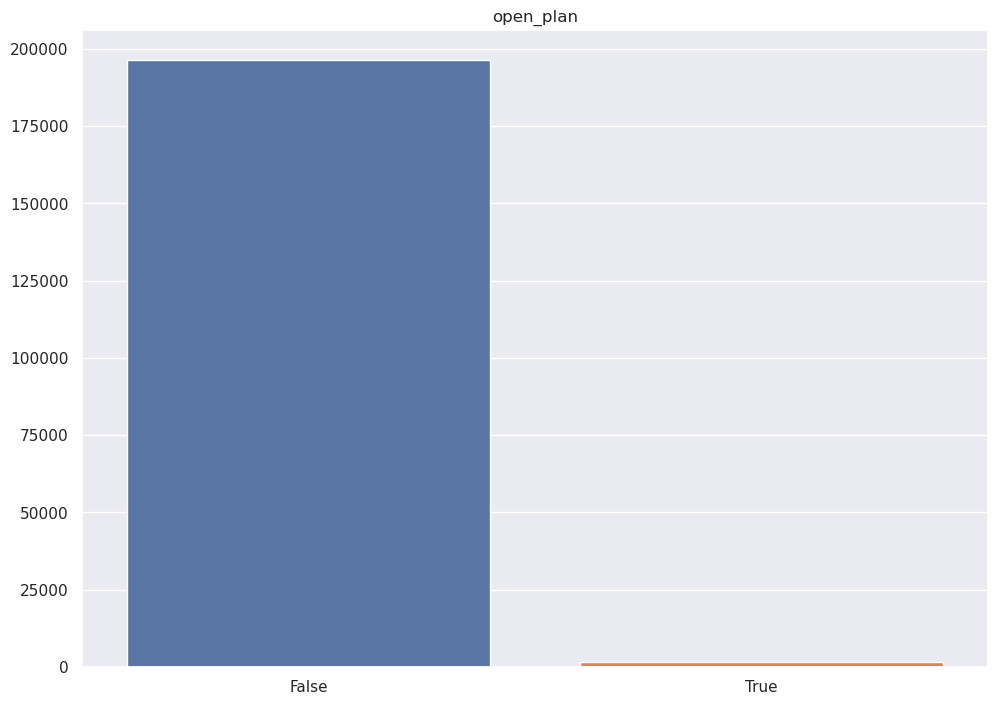

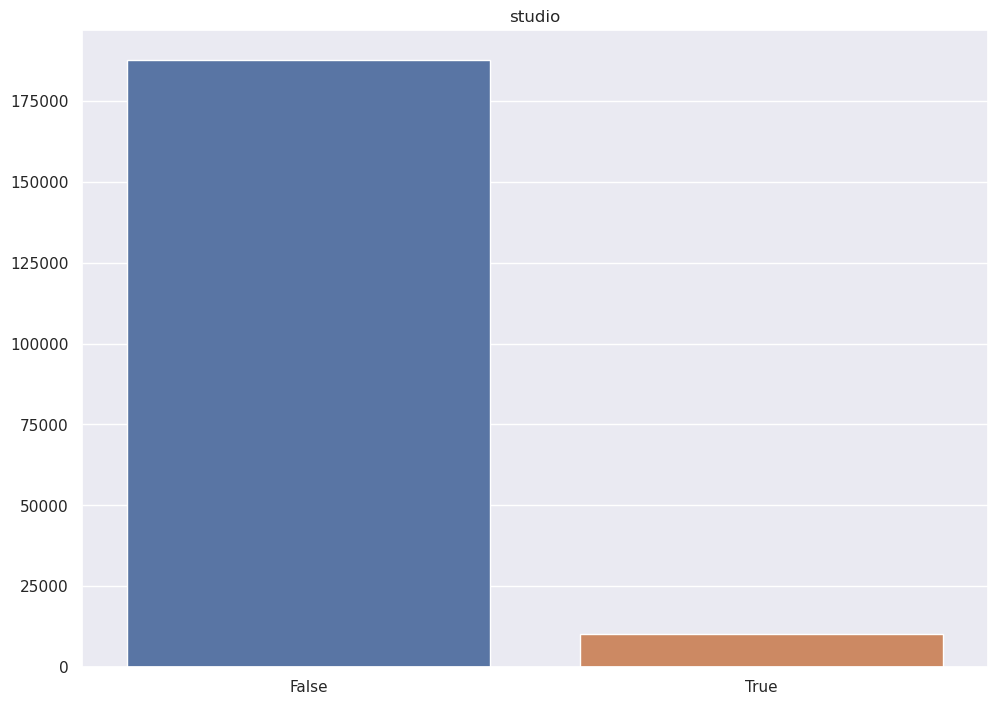

In [71]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

for i in df_cat.columns:
    value_counts = df_cat[i].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values).set_title(i)
    plt.show()

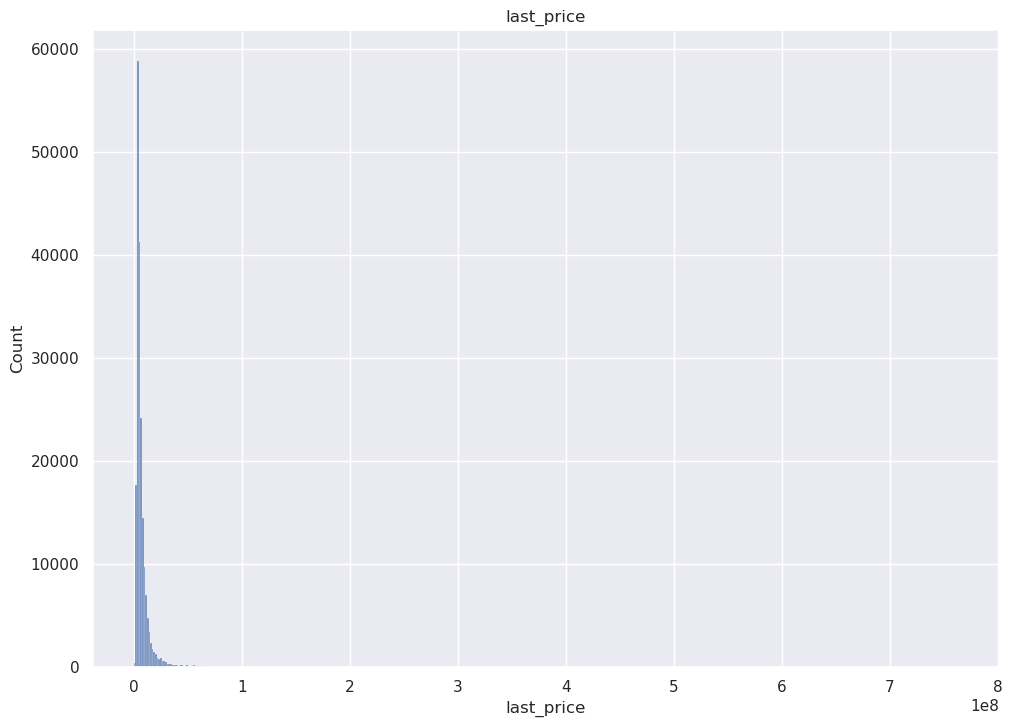

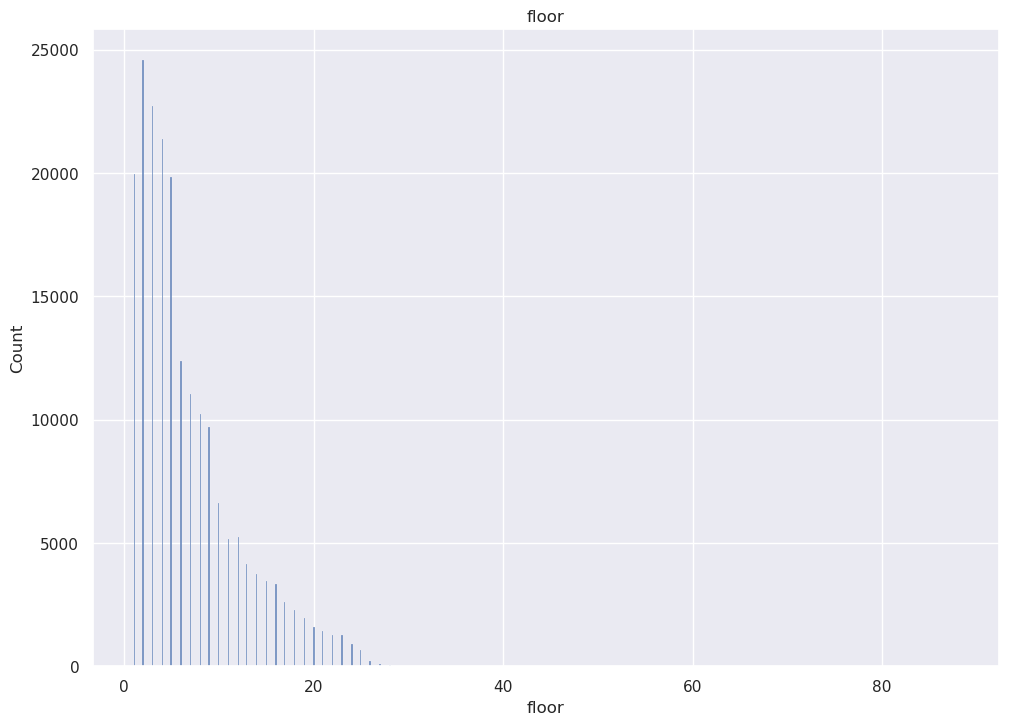

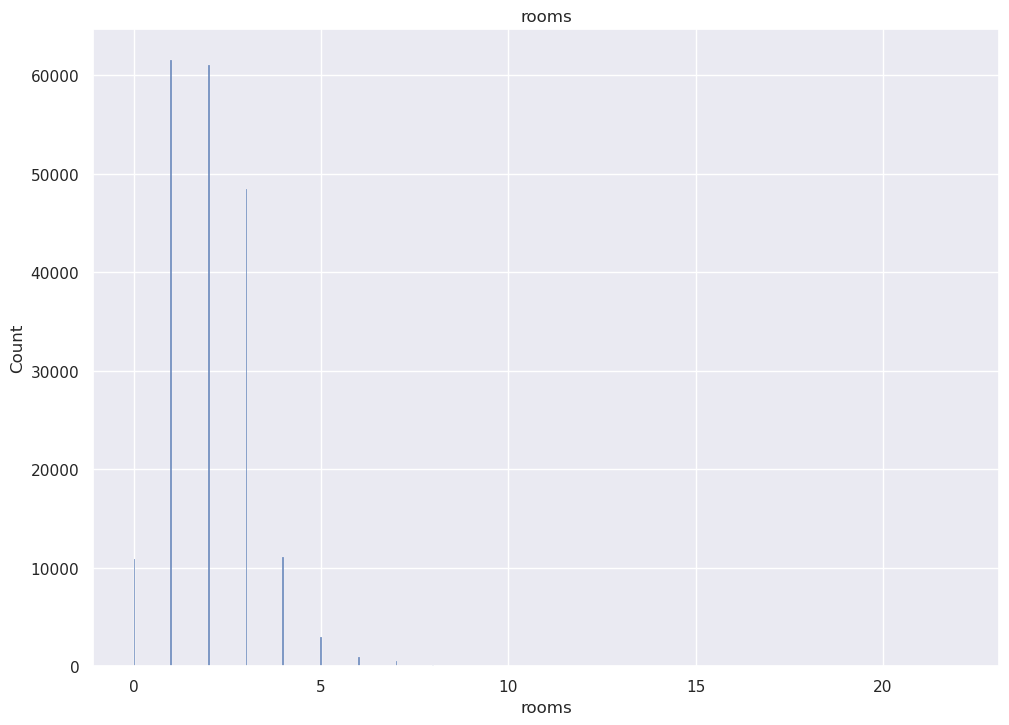

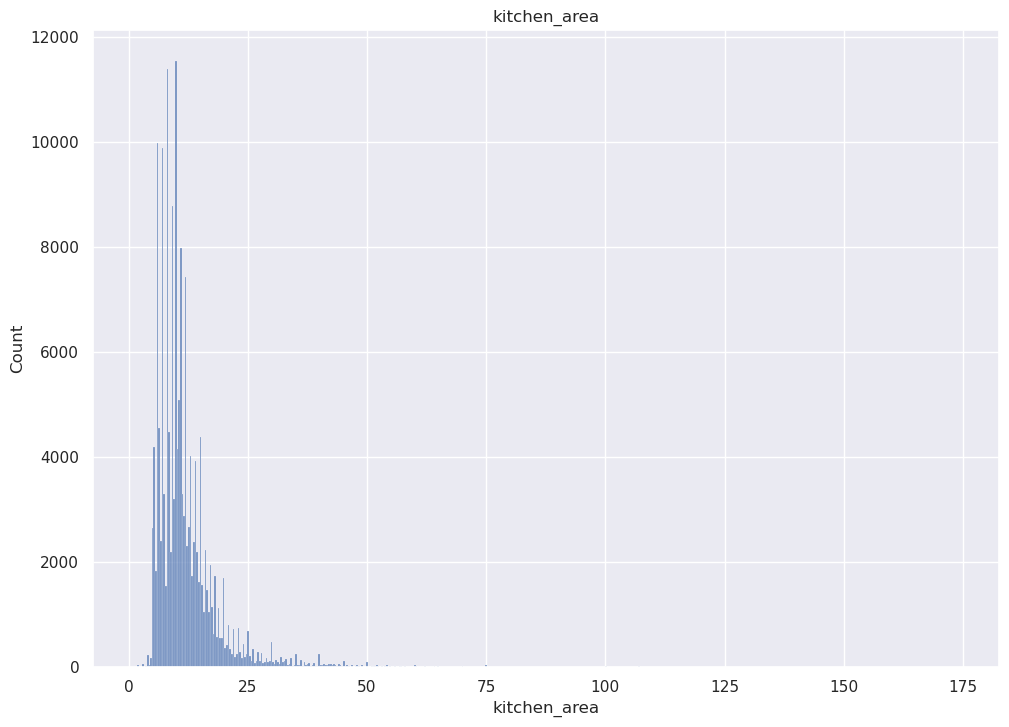

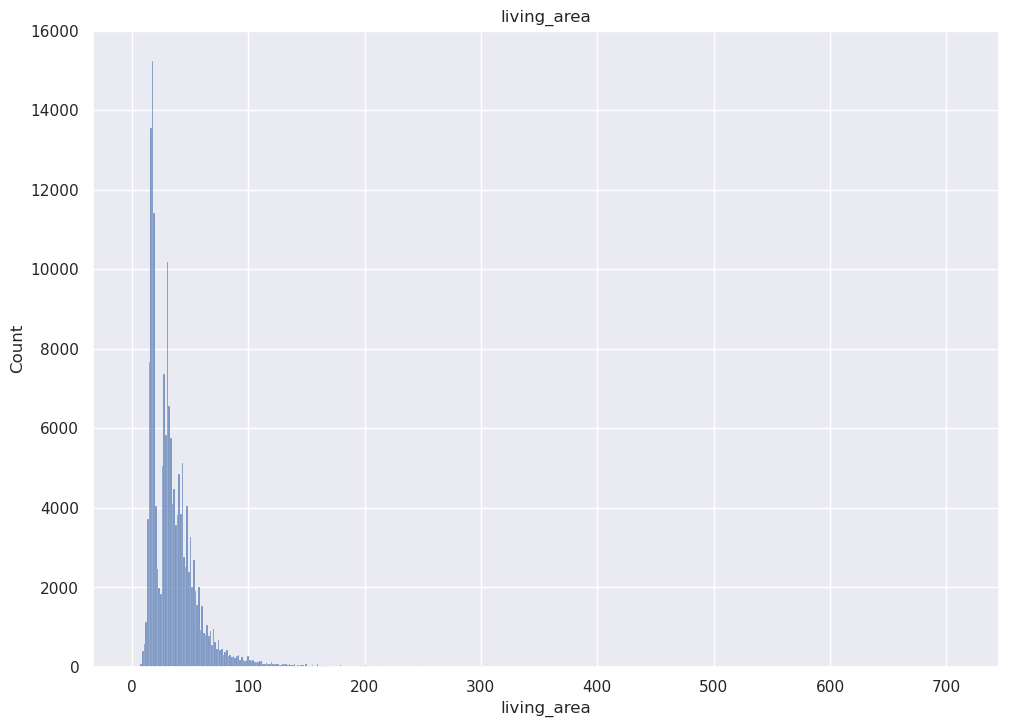

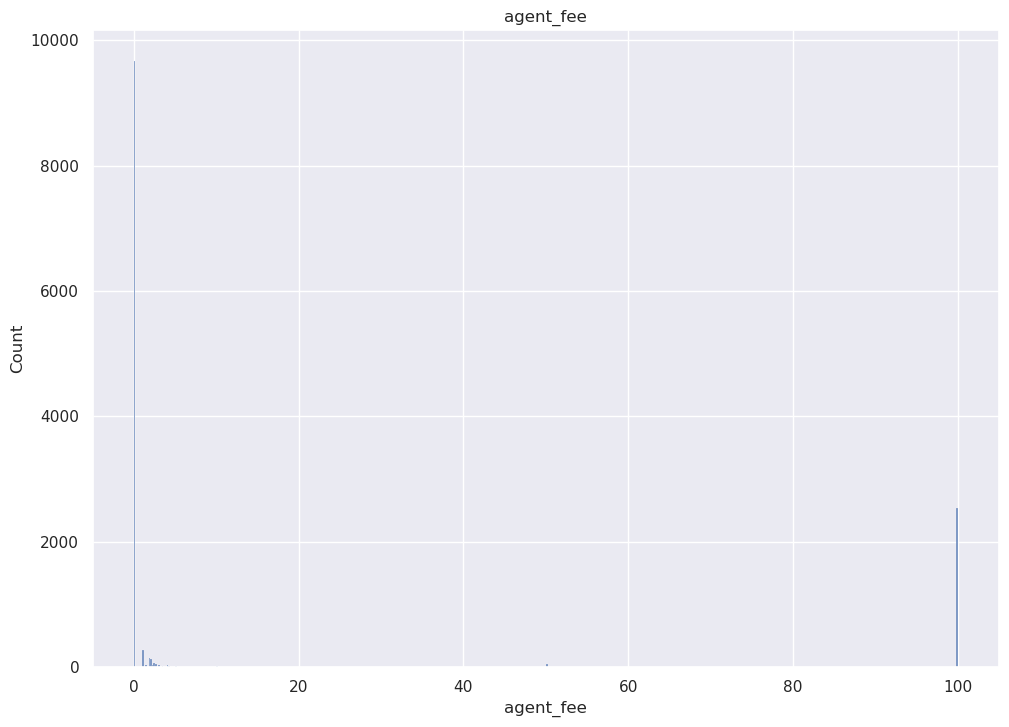

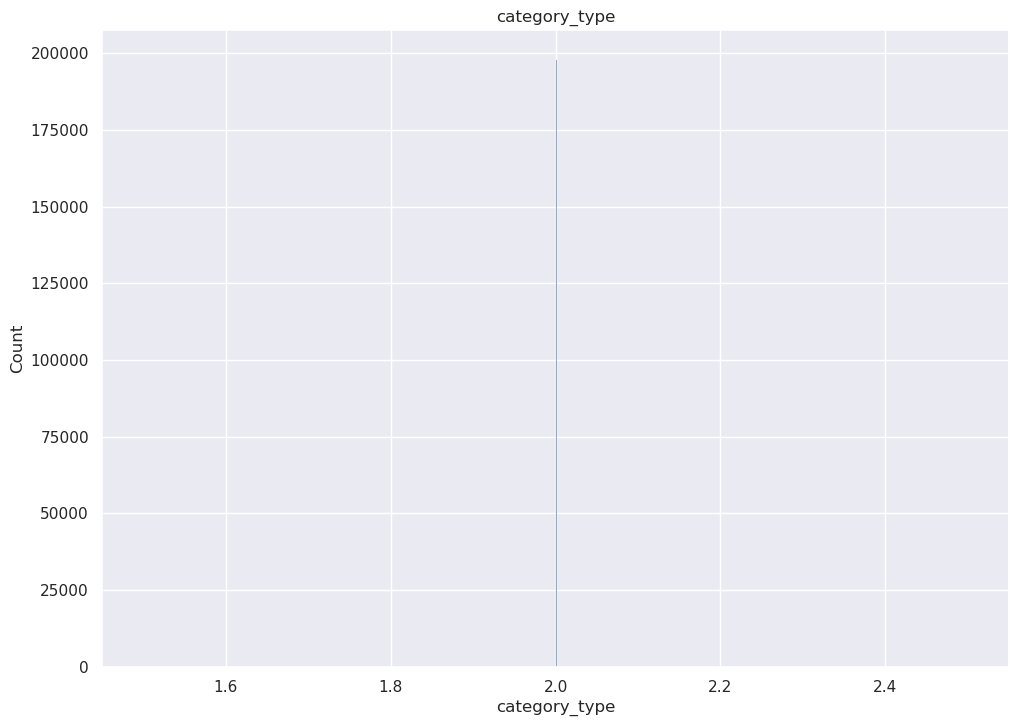

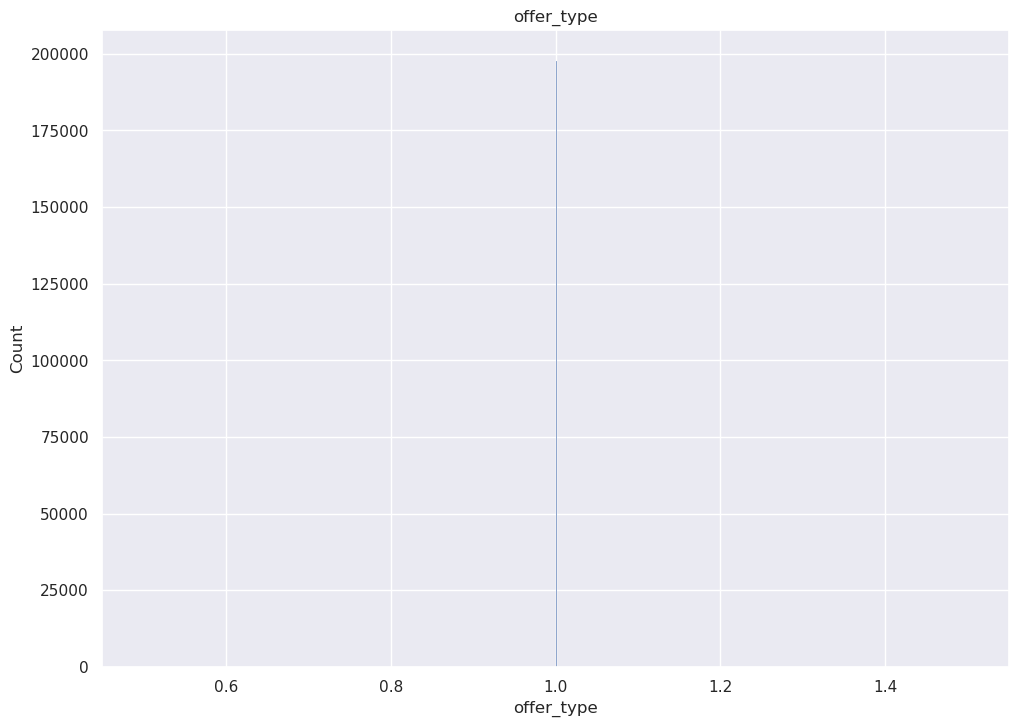

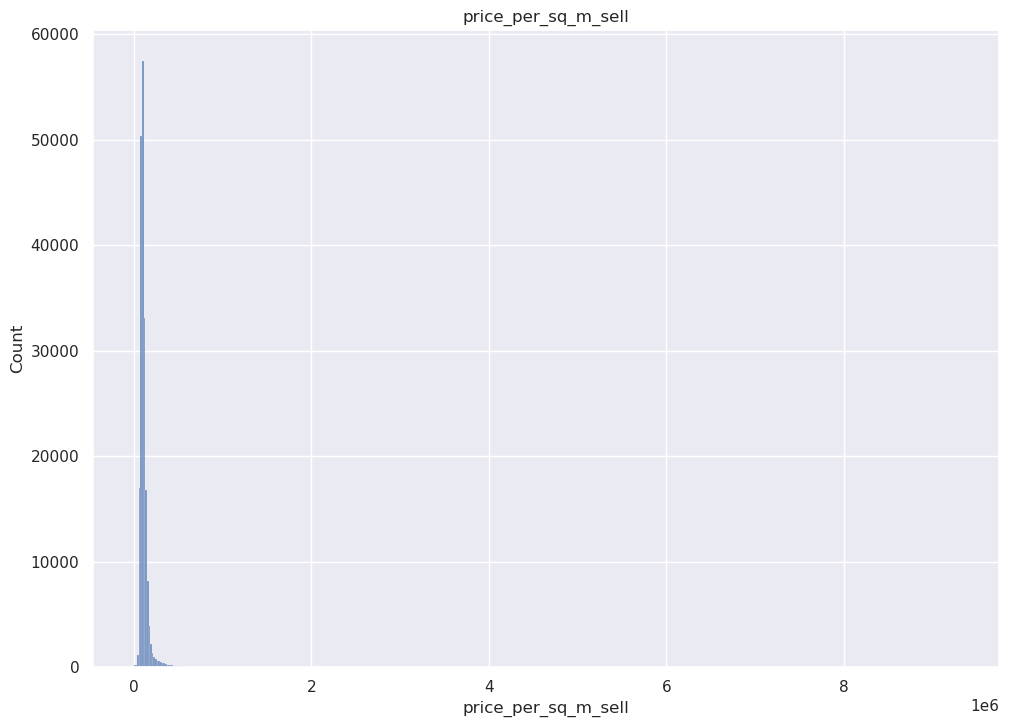

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in df_num.columns:
    sns.histplot(df_num[i], bins=500).set_title(i)
    plt.show()

In [73]:
df_num = sell_df_sbp[['last_price','floor', 'rooms', 'kitchen_area', 'living_area', 'price_per_sq_m_sell']]
sell_df_sbp.drop(columns=['category_type','agent_fee'], inplace=True)

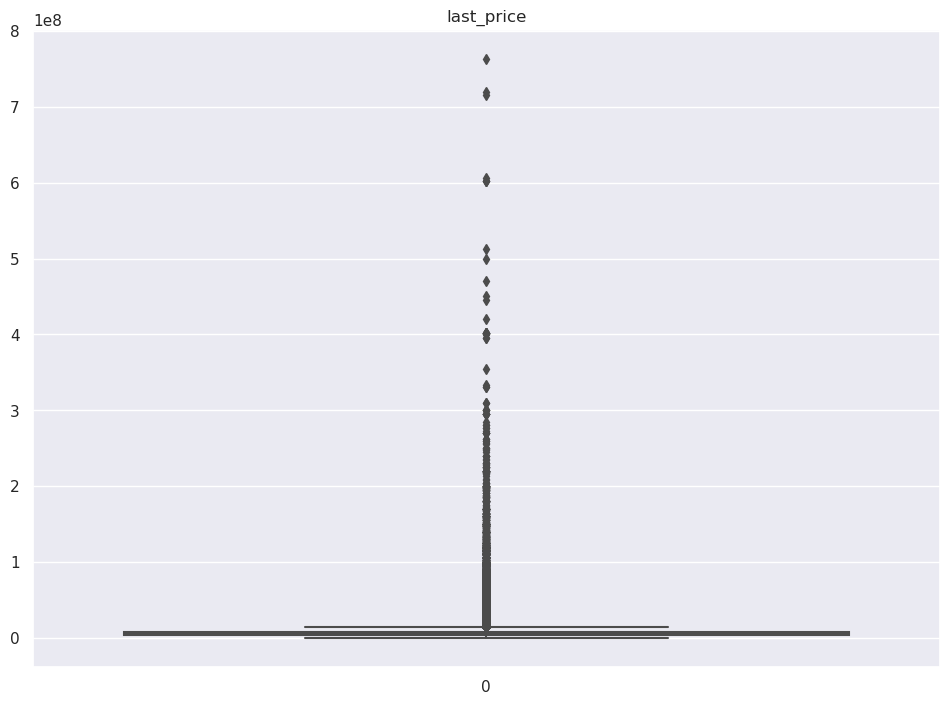

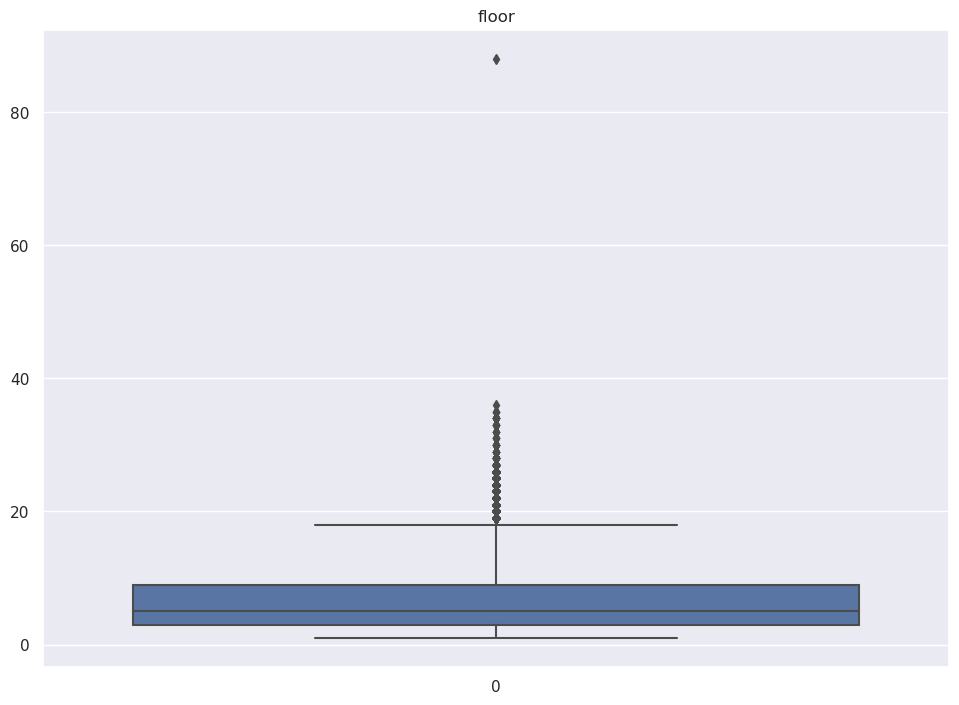

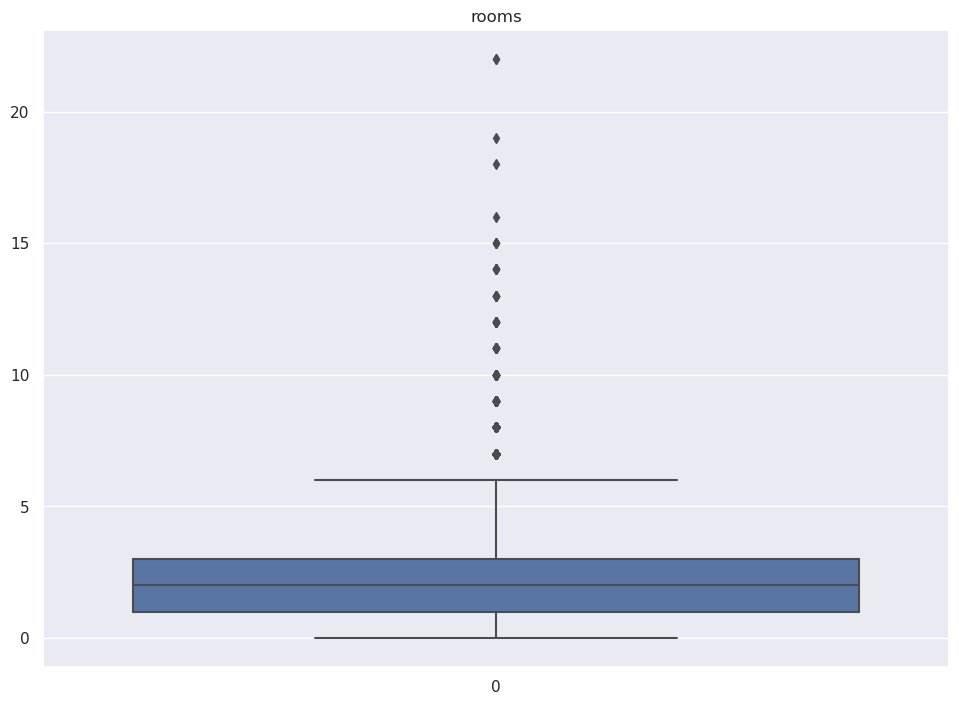

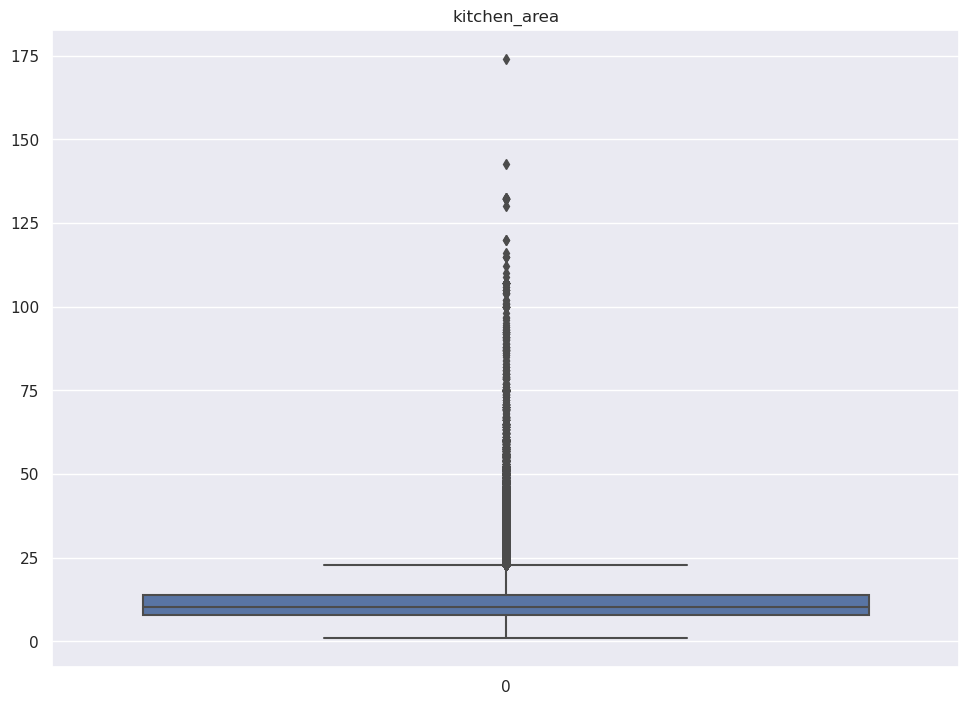

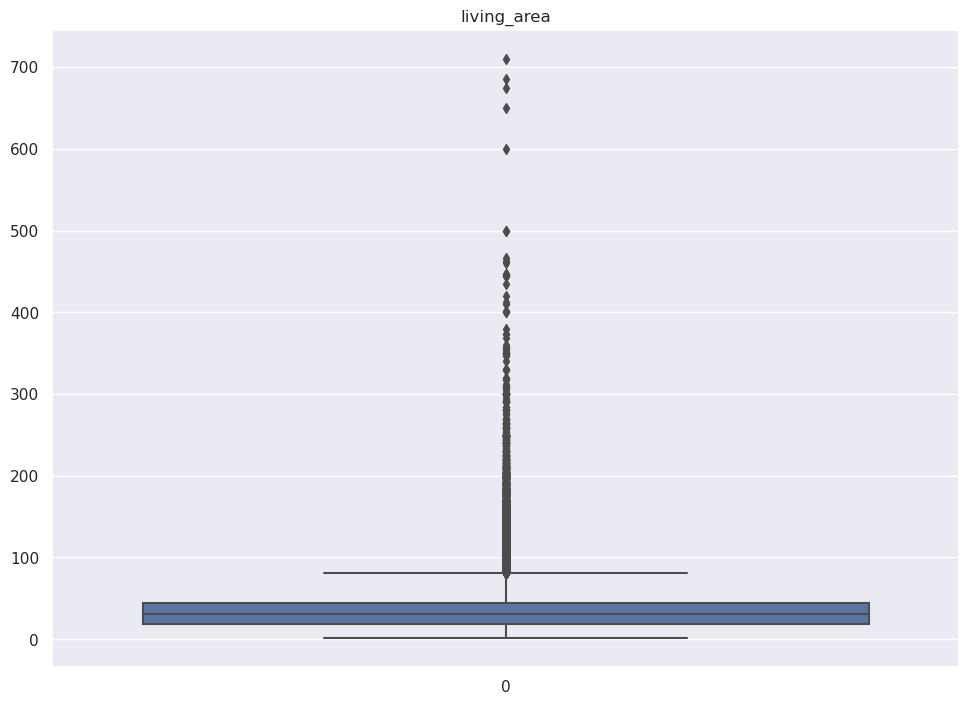

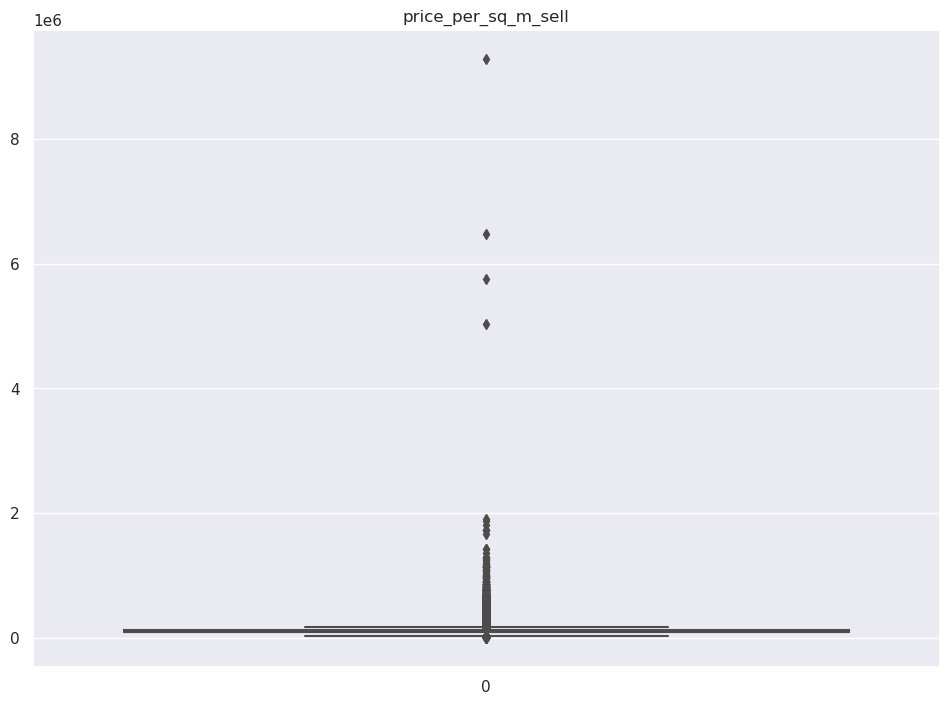

In [74]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in df_num.columns:
    sns.boxplot(df_num[i]).set_title(i)
    plt.show()

<AxesSubplot: >

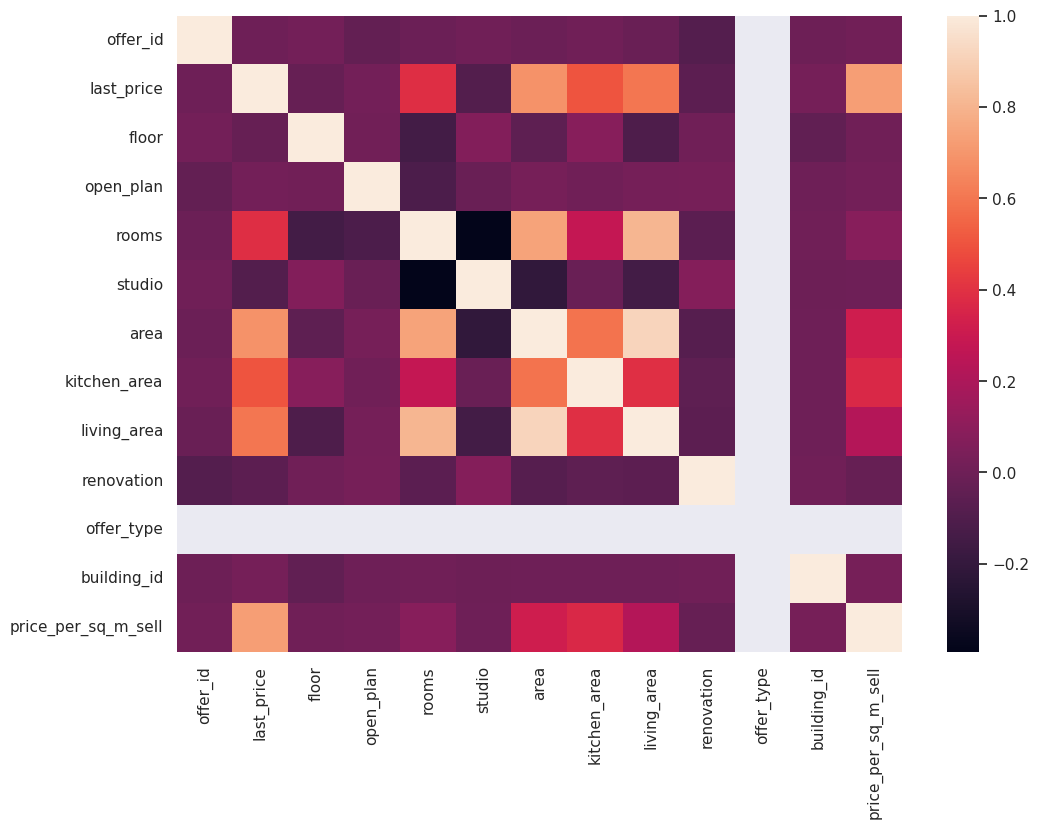

In [75]:
sns.heatmap(sell_df_sbp.corr())

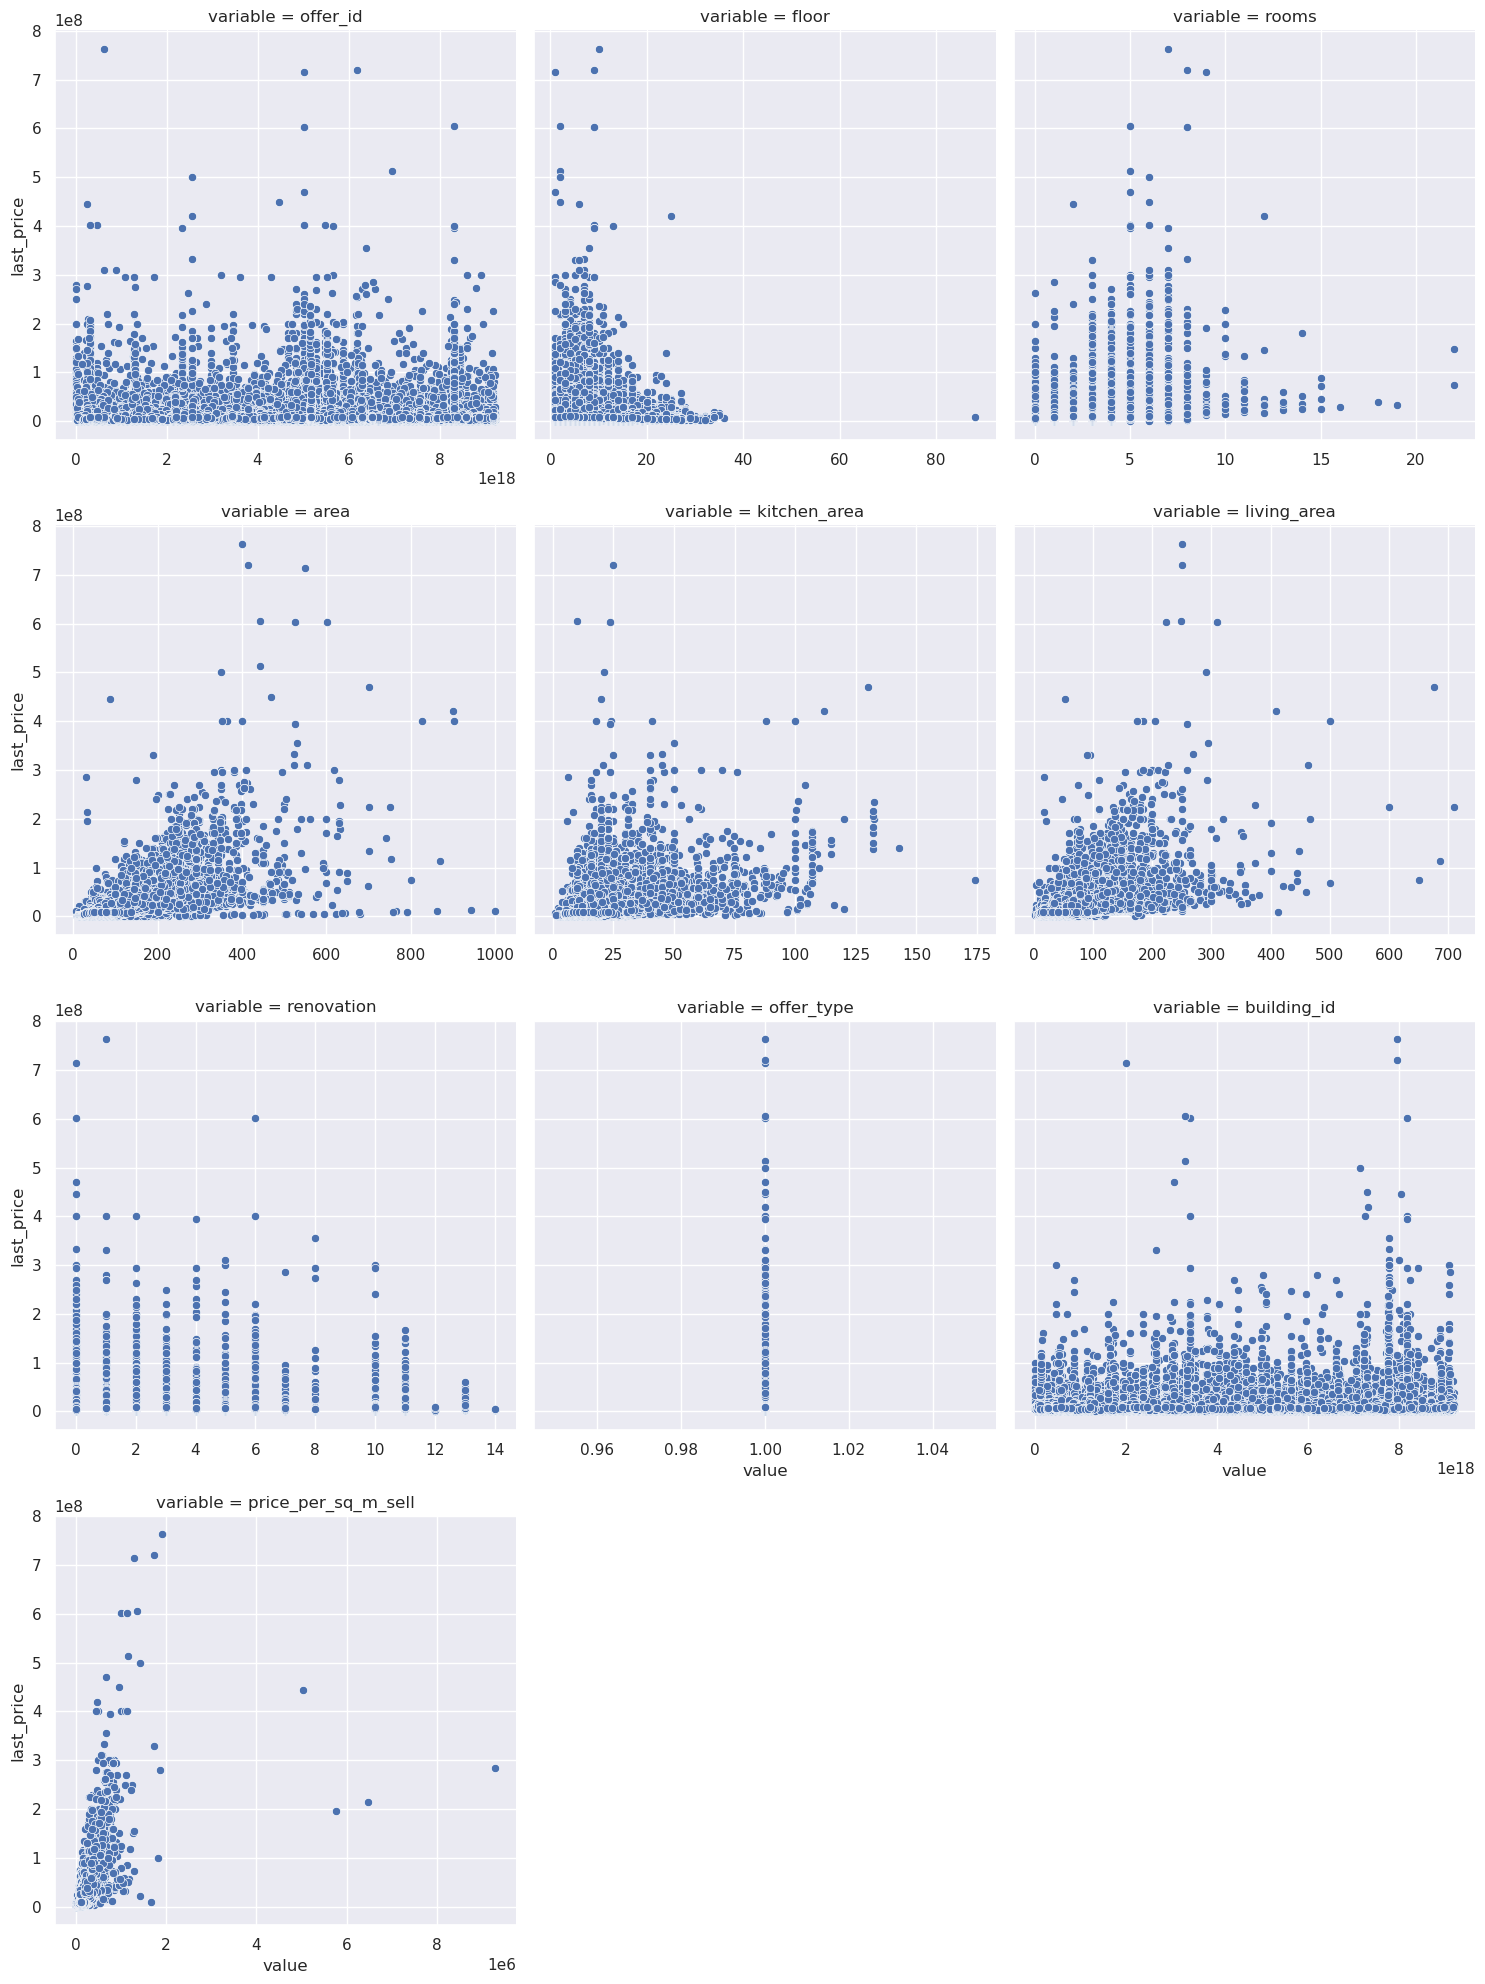

In [76]:
sns.relplot(data=sell_df_sbp.select_dtypes('number').melt(id_vars=['last_price']),            x='value', y='last_price', col='variable', col_wrap=3, 
            facet_kws=dict(sharex=False)           )

In [77]:
sell_df_sbp.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,renovation,offer_type,building_id,price_per_sq_m_sell
count,1.977920e+05,1.977920e+05,197792.000000,197792.000000,197792.000000,168799.000000,179219.000000,142614.000000,197792.0,1.977920e+05,1.977920e+05
mean,4.930802e+18,8.151205e+06,6.721783,2.024404,64.625235,11.937120,36.192785,3.467640,1.0,4.604822e+18,1.136452e+05
std,2.743008e+18,1.283477e+07,5.381079,1.166640,40.617352,7.153193,24.297953,3.944312,0.0,2.732627e+18,6.322742e+04
min,7.797270e+05,1.900000e+04,1.000000,0.000000,6.000000,1.040000,1.640000,0.000000,1.0,4.585730e+14,4.871795e+02
25%,2.554639e+18,3.900000e+06,3.000000,1.000000,40.200000,8.000000,19.000000,0.000000,1.0,2.179036e+18,8.714286e+04
50%,5.283731e+18,5.300000e+06,5.000000,2.000000,55.000000,10.200000,31.000000,2.000000,1.0,4.727029e+18,1.022857e+05
75%,7.278733e+18,8.200000e+06,9.000000,3.000000,76.400000,13.900000,44.000000,6.000000,1.0,6.919866e+18,1.230101e+05
max,9.223371e+18,7.630000e+08,88.000000,22.000000,1000.000000,174.000000,710.000000,14.000000,1.0,9.220297e+18,9.283388e+06


In [78]:
sell_df_sbp = sell_df_sbp[(sell_df_sbp['last_price']<100000000) & (sell_df_sbp['last_price']>2000000)]

In [79]:
sell_df_sbp.rename(columns = {'price_per_sq_m_sell':'price_per_sq_m'}, inplace = True)

house_sell_df = sell_df_sbp.groupby('unified_address').price_per_sq_m.median().reset_index()
house_sell_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

sell_df_sbp = sell_df_sbp.merge(house_sell_df)

In [80]:
house_sell_df.sample(5, random_state=7)

,unified_address,house_price_sqm_median
10981,"Россия, Санкт-Петербург, Пушкин, Красносельское шоссе, 63",90448.717949
22533,"Россия, Санкт-Петербург, улица Червонного Казачества, 42",89498.806683
11964,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, Московское шоссе, 286",77272.727273
10187,"Россия, Санкт-Петербург, Пискарёвский проспект, 39",97359.735974
8605,"Россия, Санкт-Петербург, Наличная улица, 21",112712.975098


In [81]:
sell_df_sbp.describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,renovation,offer_type,building_id,price_per_sq_m,house_price_sqm_median
count,1.952070e+05,1.952070e+05,195207.000000,195207.000000,195207.000000,167854.000000,177638.000000,140940.000000,195207.0,1.952070e+05,1.952070e+05,1.952070e+05
mean,4.937125e+18,7.720175e+06,6.751382,2.030911,64.244301,11.861065,35.962434,3.461260,1.0,4.602801e+18,1.123718e+05,1.106472e+05
std,2.742871e+18,8.177996e+06,5.383372,1.145768,37.852993,6.831665,23.099356,3.941794,0.0,2.733158e+18,4.768928e+04,4.102177e+04
min,7.797270e+05,2.000700e+06,1.000000,0.000000,6.000000,1.040000,1.640000,0.000000,1.0,4.585730e+14,5.616475e+03,1.413043e+04
25%,2.554639e+18,3.900000e+06,3.000000,1.000000,40.785000,8.000000,19.000000,0.000000,1.0,2.179036e+18,8.727273e+04,8.888889e+04
50%,5.283731e+18,5.300000e+06,5.000000,2.000000,55.000000,10.200000,31.000000,2.000000,1.0,4.727029e+18,1.023038e+05,1.015517e+05
75%,7.300417e+18,8.200000e+06,9.000000,3.000000,76.300000,13.800000,44.000000,6.000000,1.0,6.909065e+18,1.229175e+05,1.203245e+05
max,9.223371e+18,9.990000e+07,88.000000,22.000000,1000.000000,174.000000,650.000000,14.000000,1.0,9.220297e+18,1.666666e+06,1.666666e+06


In [82]:
psm = sell_df_sbp[['house_price_sqm_median','price_per_sq_m']]

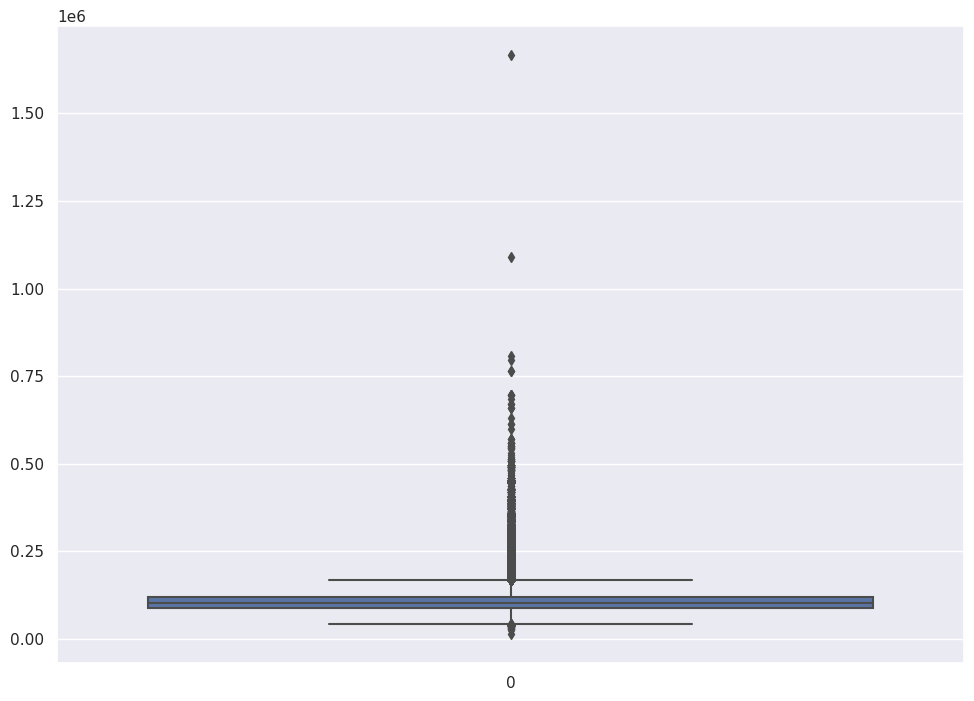

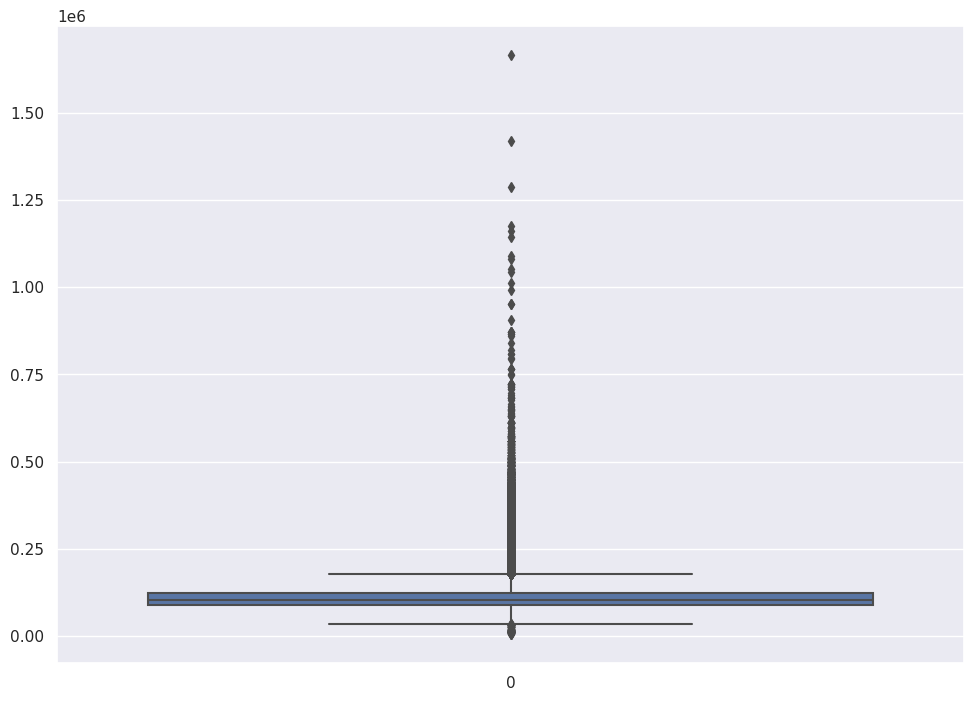

In [83]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in psm:
    sns.boxplot(psm[i])
    plt.show()

In [84]:
# Удаление строк, где отношение price_per_sq_m к house_price_sqm_median больше 5
sell_df_cleaned = sell_df_sbp[~((sell_df_sbp.price_per_sq_m/sell_df_sbp.house_price_sqm_median) > 5)]

# Удаление строк, где last_price меньше 2 000 000 или больше 100 000 000
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['last_price'] < 100000000) & (sell_df_cleaned['last_price'] > 2000000)]

# Удаление строк, где price_per_sq_m больше 500 000
# и при этом house_price_sqm_median меньше 200 000 или равен price_per_sq_m
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m > 500000)
                                     & ((sell_df_cleaned.house_price_sqm_median < 200000)
                                        | (sell_df_cleaned.house_price_sqm_median == sell_df_cleaned.price_per_sq_m)))]

# Удаление строк, где price_per_sq_m меньше 38 000
# и при этом отношение house_price_sqm_median к price_per_sq_m больше или равно 2
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m < 38000)
                               & (sell_df_cleaned.house_price_sqm_median/sell_df_cleaned.price_per_sq_m >= 2))]

# Удаление строк, где price_per_sq_m меньше 30 000
# и при этом price_per_sq_m равен house_price_sqm_median
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m < 30000)
                                          & (sell_df_cleaned.price_per_sq_m == sell_df_cleaned.house_price_sqm_median))]


In [85]:
psm_cleaned = sell_df_cleaned[['house_price_sqm_median','price_per_sq_m']]

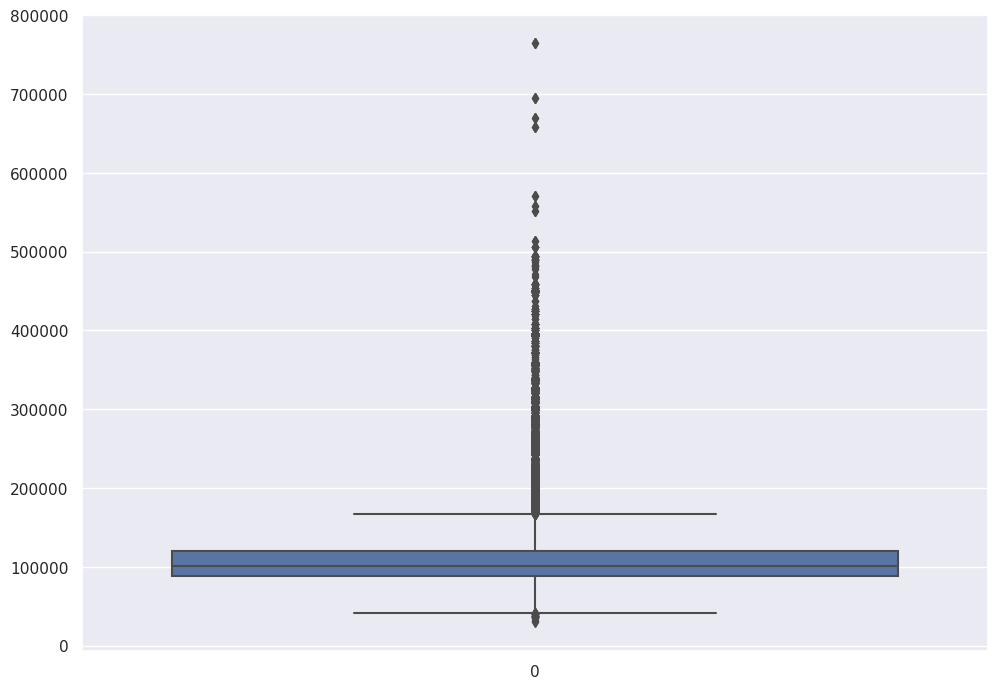

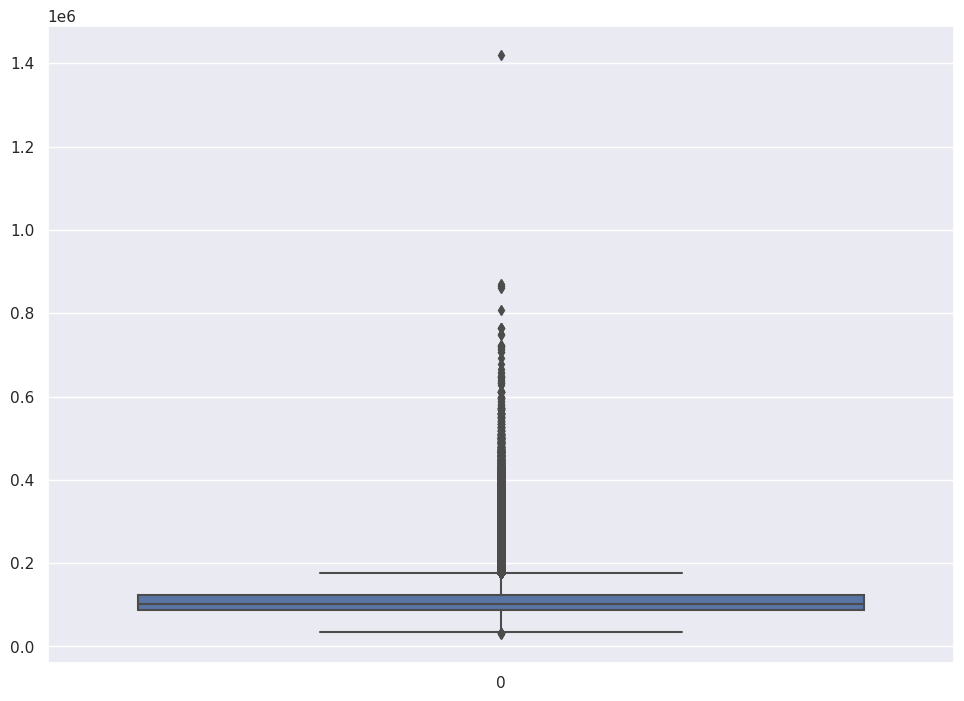

In [86]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in psm:
    sns.boxplot(psm_cleaned[i])
    plt.show()

In [87]:
other_columns_cleaning = sell_df_cleaned[['floor',
                                          'area',
                                          'kitchen_area',
                                          'living_area']]

In [88]:
sell_df_cleaned['floor'].quantile(0.999)

26.0

In [89]:
sell_df_cleaned[sell_df_cleaned['rooms']==0].value_counts()

Series([], dtype: int64)

In [90]:
for i in other_columns_cleaning:
    
    median = other_columns_cleaning[i].median()
    sell_df_cleaned[i] = sell_df_cleaned[i].fillna(median)

In [91]:
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['floor'] <= 27)]
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['living_area'] < 350)]
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['kitchen_area'] < 100)]
sell_df_cleaned = sell_df_cleaned[sell_df_cleaned['area']>11]
sell_df_cleaned = sell_df_cleaned[(sell_df_cleaned['area'] < 630)]

In [92]:
sell_df_cleaned.shape

(194916, 17)

In [93]:
sell_df.shape

(258001, 18)

#### Houses with the most cheapest and most expensive price per sq m in St. Petersburg

In [94]:
sell_df_cleaned[sell_df_cleaned.house_price_sqm_median == sell_df_cleaned.house_price_sqm_median.max()]\
    .groupby('unified_address')\
    .agg(num_appartments=('offer_id', 'count'), 
         avg_house_price_sqm_median=('house_price_sqm_median', 'mean'))

,num_appartments,avg_house_price_sqm_median
unified_address,,
"Россия, Санкт-Петербург, Бронницкая улица, 27",2,764861.111111


In [95]:
sell_df_cleaned[sell_df_cleaned.house_price_sqm_median == sell_df_cleaned.house_price_sqm_median.min()]\
    .groupby('unified_address')\
    .agg(num_appartments=('offer_id', 'count'), 
         avg_house_price_sqm_median=('house_price_sqm_median', 'mean'))

,num_appartments,avg_house_price_sqm_median
unified_address,,
"Россия, Санкт-Петербург, Петергоф, Широкая улица, 52",1,30272.727273


### Exercise 4

4. Find the most expensive and the most cheapest apartment in St. Petersburg after cleaning outliers.

In [96]:
sell_df_cleaned[sell_df_cleaned.last_price == sell_df_cleaned.last_price.max()]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,renovation,offer_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
88744,4047291,2015-09-25T00:00:00+03:00,2016-02-12T00:00:00+03:00,99900000.0,2,False,3,False,152.0,10.2,102.0,10.0,1,"Россия, Санкт-Петербург, набережная Мартынова, 62",4378677413263079878,657236.842105,506417.112299


In [97]:
sell_df_cleaned[sell_df_cleaned.last_price == sell_df_cleaned.last_price.min()]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,renovation,offer_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
130619,5614092655290296258,2017-01-19T00:00:00+03:00,2017-01-24T00:00:00+03:00,2000700.0,13,False,1,False,24.7,10.2,31.0,0.0,1,"Россия, Санкт-Петербург, улица Крыленко, 1к1с2",5915003919436159235,81000.0,96969.69697
130620,5614092655290296413,2017-01-19T00:00:00+03:00,2017-01-24T00:00:00+03:00,2000700.0,5,False,1,False,24.7,10.2,31.0,0.0,1,"Россия, Санкт-Петербург, улица Крыленко, 1к1с2",5915003919436159235,81000.0,96969.69697
130621,5614092655290296360,2017-01-19T00:00:00+03:00,2017-01-24T00:00:00+03:00,2000700.0,7,False,1,False,24.7,10.2,31.0,0.0,1,"Россия, Санкт-Петербург, улица Крыленко, 1к1с2",5915003919436159235,81000.0,96969.69697
130622,5614092655290296324,2017-01-19T00:00:00+03:00,2017-01-24T00:00:00+03:00,2000700.0,9,False,1,False,24.7,10.2,31.0,0.0,1,"Россия, Санкт-Петербург, улица Крыленко, 1к1с2",5915003919436159235,81000.0,96969.69697


### Exercise 5

5. Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

In [98]:
print("Rent: ",rent_df.building_id.nunique())
print("Sell: ",sell_df.building_id.nunique())

Rent:  23236
Sell:  33234


In [99]:
rent_df = spb_df[spb_df.offer_type == 2].copy()
print("Total rent data size: {}".format(len(rent_df)))
rent_df_spb = rent_df[rent_df.unified_address.str.contains('Россия, Санкт-Петербург')].copy()
print("Rent data size in city limits: {}".format(len(rent_df_spb)))

# calculate price per sq m
rent_df_spb['price_per_sq_m'] = rent_df_spb.last_price/rent_df.area

house_rent_df = rent_df_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

rent_df_spb = rent_df_spb.merge(house_rent_df)

Total rent data size: 171186
Rent data size in city limits: 156054


In [100]:
# Фильтрация строк с отношением price_per_sq_m к house_price_sqm_median больше 5
rent_df_cleaned = rent_df_spb[~(rent_df_spb.price_per_sq_m / rent_df_spb.house_price_sqm_median > 5)]

# Фильтрация строк с last_price меньше 1 000 000
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]

# Фильтрация строк, где price_per_sq_m больше 3000 и при этом
# house_price_sqm_median меньше 1000 или равен price_per_sq_m
rent_df_cleaned = rent_df_cleaned[
    ~((rent_df_cleaned.price_per_sq_m > 3000) & 
      ((rent_df_cleaned.house_price_sqm_median < 1000) | 
       (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))
]

# Фильтрация строк, где price_per_sq_m меньше 250 и при этом
# отношение house_price_sqm_median к price_per_sq_m больше или равно 2
rent_df_cleaned = rent_df_cleaned[
    ~(rent_df_cleaned.price_per_sq_m < 250 & 
      (rent_df_cleaned.house_price_sqm_median / rent_df_cleaned.price_per_sq_m >= 2))
]

# Фильтрация строк, где price_per_sq_m меньше 200 и при этом
# price_per_sq_m равен house_price_sqm_median
rent_df_cleaned = rent_df_cleaned[
    ~(rent_df_cleaned.price_per_sq_m < 200 & 
      (rent_df_cleaned.price_per_sq_m == rent_df_cleaned.house_price_sqm_median))
]


In [101]:
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned['last_price']<200000]

rent_df_cleaned.drop(columns=['category_type'], inplace=True)
rent_df_cleaned.drop(columns=['agent_fee'], inplace=True)

rent_df_cleaned['open_plan'] = rent_df_cleaned['open_plan'].astype('int')
rent_df_cleaned['studio'] = rent_df_cleaned['studio'].astype('int')

In [102]:
rent_df_cleaned.head(2)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,renovation,offer_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
0,1100202,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,0,1,0,28.0,8.0,20.0,3.0,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,714.285714,512.820513
1,4593125,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,4,0,2,0,59.0,10.0,35.0,3.0,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,406.779661,512.820513


In [103]:
house_rent_df_5task = rent_df_cleaned.groupby('building_id').price_per_sq_m.median().reset_index()

house_rent_df_5task.rename(columns={'price_per_sq_m': 'house_price_sqm_median_rent'}, inplace=True)

In [104]:
house_sell_df_5task = sell_df_cleaned.groupby('building_id').price_per_sq_m.median().reset_index()
house_sell_df_5task.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_sell'}, inplace = True)

In [105]:
final_df = pd.merge(house_sell_df_5task, house_rent_df_5task, on='building_id', how='inner')

final_df.head(3)

,building_id,house_price_sqm_median_sell,house_price_sqm_median_rent
0,458573008430269,141157.760814,662.020906
1,3603962364551559,123231.911249,500.000000
2,3603962364551561,98925.205181,531.015038


In [106]:
final_df= final_df.assign(C= final_df['house_price_sqm_median_sell'] / final_df['house_price_sqm_median_rent'])

final_df.head(3)

,building_id,house_price_sqm_median_sell,house_price_sqm_median_rent,C
0,458573008430269,141157.760814,662.020906,213.222512
1,3603962364551559,123231.911249,500.000000,246.463822
2,3603962364551561,98925.205181,531.015038,186.294546


In [107]:
final_df.C.min()

52.29591836734694

In [108]:
house_rent_df_5task_1 = rent_df_cleaned.groupby('building_id').last_price.median().reset_index()
house_rent_df_5task_1.rename(columns = {'last_price': 'price_median_rent'}, inplace = True)

house_sell_df_5task_1 = sell_df_cleaned.groupby('building_id').last_price.median().reset_index()
house_sell_df_5task_1.rename(columns = {'last_price': 'price_median_sell'}, inplace = True)

In [109]:
final_df_1 = pd.merge(house_sell_df_5task_1, house_rent_df_5task_1, on='building_id', how='inner')

In [112]:
final_df_1= final_df_1.assign(C= final_df_1['price_median_sell'] / final_df_1['price_median_rent'] / 12)

In [113]:
sorted_df_1 = final_df_1.sort_values('C', ascending=True)
sorted_df_1

,building_id,price_median_sell,price_median_rent,C
6914,3967985793187418353,2230000.0,150000.0,1.238889
3091,1627973416240229632,4600000.0,180000.0,2.129630
9641,5553660887271054733,4700000.0,140000.0,2.797619
1913,815795893180413008,2556000.0,75000.0,2.840000
6568,3673956658633628256,4100000.0,120000.0,2.847222
...,...,...,...,...
11926,6749677014473038546,29900000.0,15000.0,166.111111
15861,8932634527448966302,36229000.0,16000.0,188.692708
13689,7528309176946493882,85000000.0,26000.0,272.435897
1194,536301776913345245,83500000.0,25000.0,278.333333


In [116]:
rent_df_cleaned.to_csv('cleaned_dataset.csv', index = False, sep='\t')